# 问题

1. 逻辑回归的问题
    - $y = S( xW)$ ，其中y是概率；
        - 逻辑回归，分类的效果，实际还是线性。（绘制图形，分类边界线：直线）：属于线性回归；
        - 输出概率：正分类概率（属于A概率），负分类概率（属于B概率）
            - y只输出一个概率。就算正分类概率：99.99% 负分类概率（99.999%）
                - p(A) + p(B) =1 p(A)>=0.5 可以做结论。
            - 标签进行改造：
                - A = 0    :     `[1,  0]`
                - B = 1    :     `[0,  1]`
                
            - 训练：
                - $p =  [p_a, p_b]$    
                    - $p_a \gt   p_b ,\qquad   x \in A \text{类}$

2. 一个不能线性可分的例子

100


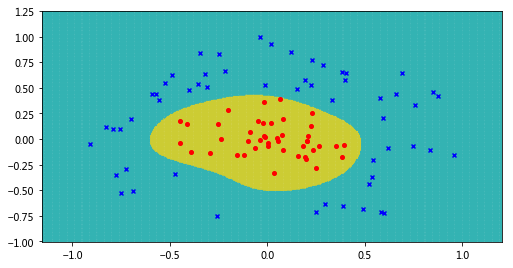

array([-1., -1., -1., ..., -1., -1., -1.])

In [73]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn  as sk
import pandas as pd
from sklearn.svm  import SVC
from  matplotlib.colors import ListedColormap    
from sklearn.linear_model import LogisticRegression

# 样本集的该要信息（可视化）

# 1. 读取数据样本
data = pd.read_csv('train_data.csv')
# 对数据分成-1，1两类
# data['label'] == 1.0
data_1 = data[data['label'].isin([1.0])]
data_2 = data[data['label'].isin([-1.0])]
# -----------------
# 训练特征（2个特征：列）样本
X = data[['feature1', 'feature2']]
# 训练标签
Y =data['label']
# 使用sklearn创建SVM分类器SVC
classfier = SVC(C=1, gamma=10)    # SVM分类器
# classfier = LogisticRegression()
# 开始训练
classfier.fit(X,Y)    # 训练过程中得到一些参数。
# 预测(使用训练集作为预测样本)
predict = classfier.predict(X)   # 得到的结果就是分类结果
print((predict == data['label']).sum())
# -----------------
# 2. 可视化
figure = plt.figure('SVM', figsize=(8,4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])
# ===================
# 使用颜色把分类的区域标识出来（达到3维信息的可视化效果）
# 把数据所在范围：分成若干行与列，每个行列的交叉点当成样本数据，
# 这个样本数据在上面的训练结果下有一个预测值，这个预测值使用不同颜色绘制出来，就形成区域
# 1. 对数据x，y方向取最大值与最小值
# 取两个特征的数据值
x1 = X['feature1']
x2 = X['feature2']
# 最两个坐标轴定位最大最小值
x1_min, x1_max = x1.min(), x1.max()    # x轴
x2_min, x2_max = x2.min(), x2.max()  # y轴
# 放大
x1_min -= 0.25
x1_max += 0.25
x2_min -= 0.25
x2_max += 0.25
ax.set_xlim(x1_min, x1_max)
ax.set_ylim(x2_min, x2_max)
# 2. 把最小与最大之间划分成n个等差数列值。
x1_grid,  x2_grid = np.mgrid[x1_min: x1_max: 400j, x2_min: x2_max: 400j]   # 根据类似切片的数据描述分成n等分
# 3. 形成n*n的坐标（表示一样笨）列表
# 把数据变成一维
x1_flat = x1_grid.flat    # 2维变1为
x2_flat = x2_grid.flat

# 形成网格坐标
grid_plane =np.stack((x1_flat, x2_flat), axis=1)  # 对应映射，形成坐标（是一个矩阵）
# 4. 列表中的每个坐标在训练模型下，就有一个输出值（分类）
grid_predict = classfier.predict(grid_plane)

# 5. 根据输出值，直接绘制颜色（,atplotlib中Axes提供一个函数绘制这种图形）pcolormesh 像素颜色网格图ax.pcolormesh
#  grid_predict的数据是1维，变成对应的坐标格式：与x1_grid，x2_grid形状。

ax.pcolormesh(x1_grid, x2_grid, grid_predict.reshape(x1_grid.shape),  cmap=ListedColormap([ (0.2, 0.7, 0.7, 0.7),(0.8, 0.8, 0.2, 0.7)]))
# ===================
ax.scatter(data_1['feature1'], data_1['feature2'], c='r', s=16, marker='o')
ax.scatter(data_2['feature1'], data_2['feature2'], c='b', s=16, marker='x')

plt.show()
grid_predict

- 注释：
    - 实现逻辑回归，这两类样本不可分的。
    
    - 算法的掌握程度：
        - 利用sklearn，tensorflow调用算法函数；
        - 调整参数
            - 用参：理解参数的含义：控制参数达到我的目标；
            - 调参：训练参数：机器训练得到最佳参数
           
        - 在别人的算法基础上，设计算法
            - 设计算法（根据业务数据，选择算法改进）
            - 实现算法
            
        - 创新算法

3. 使用SVM的不可分的效果

# SVM的模型

## 问题的出发点

- 从分类的另外角度来谈起

- 逻辑回归的不足或者逻辑回归的优化

    - 使用逻辑回归分类
        - 使用鸢尾花的数据来进行分类；（鸢尾花取2个特征：特征1，特征2（花萼宽度与长度）| 特征3，特征4（花瓣宽度与长度） ）

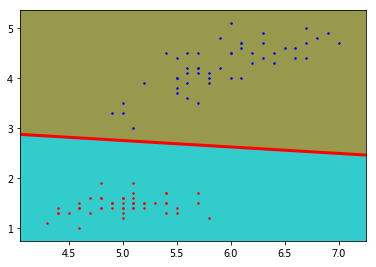

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [116]:
% matplotlib inline
import numpy as np
import sklearn.datasets as ds     # 鸢尾花数据集
from sklearn.linear_model import LogisticRegression   # 逻辑回归
import matplotlib.pyplot as plt    
from matplotlib.colors import ListedColormap    # 颜色列表


# 1. 加载鸢尾花数据
data, target = ds.load_iris(return_X_y=True)

X = data[0:100, ::2 ]   # 取100个样本（A类与B类），2个特征（花瓣的高度，花萼的高度）
Y = target[0:100]
# 3. 使用逻辑回归分类
classfier = LogisticRegression(solver='lbfgs')   # 默认参数

# 训练数据
classfier.fit(X,Y)

# 预测
X_pre = classfier.predict(X)   # 100%的正确率（正确率无法完全说明训练效果的好坏：精准率 + 召回率）



# 2. 可视化鸢尾花数据（50 + 50 = 100）
figure = plt.figure('逻辑回归', figsize=(6, 4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])
# 4. 可视化分类效果
# ====================
# x轴，y轴均等n等分
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
# 放大
x1_min -= 0.25
x1_max += 0.25
x2_min -= 0.25
x2_max += 0.25

ax.set_xlim(x1_min, x1_max)
ax.set_ylim(x2_min, x2_max)
# 绘制的坐标点
x1_grid , x2_grid = np.mgrid[x1_min: x1_max: 1000j, x2_min: x2_max: 1000j] 

grid_plane = np.stack( (x1_grid.flat,  x2_grid.flat), axis = 1)   # 一维

# 根据坐标点，得到分类结果
c = classfier.predict(grid_plane)   # 分类（0，1），绘制时候，根据0，1选择样本的显示颜色
# c的形状与x1_grid同型
c = c.reshape(x1_grid.shape)

colors = ListedColormap([(0.2, 0.8, 0.8), (0.6, 0.6, 0.3)])

ax.pcolormesh(x1_grid, x2_grid, c, cmap=colors )

# 形成坐标系网格模拟样本

# 使用上面训练结果，得到模拟样本的分类结果

# 使用颜色标识出来

# ====================
ax.scatter(X[:50, 0], X[:50, 1], c='r', s=9, marker='.')  # 前面50个A类数据
ax.scatter(X[50:, 0], X[50:, 1], c='b', s=9, marker='.')  # 后面50个B类数据

# 可视化逻辑回归的直线

coef = classfier.coef_
intercept = classfier.intercept_

# 按照x轴取1000个点
xx = np.linspace(x1_min, x1_max,1000)
#  表达分类直线
line = lambda x: - ( coef[0,0] * x + intercept) /  (coef[0, 1]) 

yy = line(xx)

ax.plot(xx,yy, color=(1,0,0,1), linewidth=3 )

plt.show()

X_pre

- 问题：
    - 分类直线是不确定的。
    - 过拟合现象。

- 思路：
    - 找一条直线，分类样本，这条直线未必一定按照分类的概率模型寻找，也可以按照几何方式查找。
    
    
- 线性分类平面：
    - $xW+b=0$     


- 决策函数：
    - $y=sign(xW+b)$     
        - |- 1:分类AB    
        - |- 2：分类C
        
        - 根据标签决定

- 新的思路：（找到一个标准，唯一确定一条直线）
    - 找一条直线
        - 直线：均分（）
        - 直线：唯一（斜率）
 
- 给定两个样本集
    - 找到距离的度量方式，计算两个样本集的距离
        - 距离最短（定义距离）
        
    - 根据距离的定义方式，找到一条垂直直线，垂直直线就是分类先。
    - 计算最大的距离
        - 垂直线过最小距离平分点的直线就是分类线。

- 距离的定义
    - 假设直线存在
        - $y = xW$
    - 距离的定义
        - 每个点到直线的距离做成度量的数据（垂直距离）
    - 损失标准
        - 样本集到直线的距离：最大。
        - 这样直线是唯一的。

- 思路：
    - 垂直距离
        

## 数据基础的推导

- 点到直线的距离表达
    1. 直线的表示
        - 丢弃这种类型的直线标识：$y = xW$
        
        
        - 从分类的角度：$0 = xW $：分类直线
            - $xW>0$：直线上部分
            - $xW<0$：直线下部分
            - $xW=0$：在直线上
            
            
    2. 距离的表达
- 直线：$xW = 0, W = [w_1,w_2,\dots,w_n] ^T $
- 点：$x^ \prime = [x_1,x_2,\dots,x_n]$

- $d= \dfrac{| x_1w_1 + x_2w_2 + \dots + x_nw_n |}{\sqrt{w_1 ^2 + w_2 ^2 + \dots+ w_n^2}}$

- $d= \dfrac{| x_1w_1 + x_2w_2 + \dots + x_nw_n |}{||W||_2}$

- 在欧氏空间中2范数的**定义**$||W||_2 =\sqrt{w_1 ^2 + w_2 ^2 + \dots+ w_n^2} $

- $d= \dfrac{1}{ \dfrac{|n*|W||_2}{| x_1 n*w_1 + x_2n*w_2 + \dots + x_n n*w_n |}}$

- 假设$| x_1w_1 + x_2w_2 + \dots + x_nw_n | = n$

- 为了简化，记支撑点最近的距离为1.  $d= \dfrac{1}{||W||_2}$

    - 实际上，点到直线的几何距离是20还是1，不影响分类。
   

- 问题：（支撑向量Support Vector Machine： Support Vector Classfier ：SVC）
   - 找到$W$，使得，支撑向量（样本中到直线的最大距离的样本），到直线的距离是$\dfrac{1}{||W||_2}$.（不仅仅找$W$，而且是个规范化的$W$） 
   - 找到$W$，使得两个样本集的支撑向量的距离为$\dfrac{2}{||W||_2}$，而且是最大.

## SVM的模型

- 分类模型
    - 找到$W$满足：
        - $o = xW $
            - |- o=-1  :属于A类
            - |- o= 1   :属于B类

- 损失模型：
    - 这个W必须满足 $\dfrac{1}{||W||_2}$最大，  $ s.t. y (xW)= 1$:分类正确

- x = `-0.214824,0.662756`     -1   1
- y= `-1.000000`
    - W
    - y (xW)  =1
    
- x = `-0.061569,-0.091875`
- y= `1.000000`
    - W 
    - y(xW) =1

# SVM模型求解与推导

- 找到一个平面，使得训练样本正确分类，同时使得支撑向量到平面的几何距离最大。

- 问题：
    - 条件最大的求解是非常痛苦。
        - 提出数学理论，找到等价的线性求解公式。



- 条件最大->代数最大
    - ** 拉格朗日乘数定理 **
    
    - 如果： 代数最大 + 条件
        - 【代数 +  （系数 * 条件）求和  】  最大： 系数必须大于0 ：拉格朗日乘数
      

- SVM在拉格朗日乘数表示：
    - 求公式$ f(W) = \dfrac{1}{||W||_2}  +   \sum \limits _{i=1} ^{n} \alpha _i  (y_i (x_i W)- 1)  $最大
    
    - 求最小：
        - $ f(W) =\dfrac{1}{2} ||W||_2 -  \sum \limits _{i=1} ^{n} \alpha _i  (y_i (x_i W)- 1)  $最小

- 损失函数表示为：
    - $L(W, \alpha)=\dfrac{1}{2} ||W||_2 -  \sum \limits _{i=1} ^{n} \alpha _i  (y_i (x_i W)- 1)  $
    - 固定$\alpha$，$L(W, \alpha)=\dfrac{1}{2} ||W||_2 -  \alpha \sum \limits _{i=1} ^{n}  (y_i (x_i W)- 1)  $
    - 固定$\alpha$，$L(W, \alpha)= \alpha (\dfrac{1}{2} ||W||_2 - \sum \limits _{i=1} ^{n}  (y_i (x_i W)- 1))  $

- 距离：
    - 欧氏距离
    - 其他距离

- 求解
    - 假设：$\alpha_i= 常量$ ：问题就可以使用梯度下降法求解。
    - 如果$\alpha_i$如果不假设为常量，则需要通过数学推导，得到求解算法：SMO

- 算法的种类：
    - 基础算法（搜索，排序, .......）
        - 直接基于容器算法
    - 求值算法（数学推导，逻辑推导）
        - 求解（数值分析/数值计算）
    - 智能算法：机器学习算法：监督学习（预测，分类），无监督（K-Means，规则关联，PCA），半监督学习（马尔可夫链），强化学习
        - 解决问题
        
        - 机器学习中的最成功的算法：神经网络
            - 深度神经网络（深度学习）

# Tensorflow

## Tensorflow的基本编程模式（套路）

- 图模式（张量Tensor流flow（Tensorflow）：计算节点的图：张量描述：张量：常量（参数），变量（训练系数），占位量）【非交互式】
- 实时模式（直接计算，马上输出）：交互式计算模式

- 固定参数：常量
- 训练参数：变量
- 输入数据：占位符

- 按照算法啊，使用张量，实现算法实现

- 执行：
    - 初始化变量
    - 执行操作

In [23]:
import numpy as np
import tensorflow as tf
import sklearn.datasets as ds
"""
Session的构造器
__init__(
    target='',
    graph=None,
    config=None
)


tf.constant(
    value,
    dtype=None,
    shape=None,
    name='Const',
    verify_shape=False
)
# tf.Variable
__init__(
    initial_value=None,
    trainable=True,
    collections=None,
    validate_shape=True,
    caching_device=None,
    name=None,
    variable_def=None,
    dtype=None,
    expected_shape=None,
    import_scope=None,
    constraint=None,
    use_resource=None,
    synchronization=tf.VariableSynchronization.AUTO,
    aggregation=tf.VariableAggregation.NONE
)

tf.placeholder(
    dtype,
    shape=None,
    name=None
)

run(
    fetches,      # 操作
    feed_dict=None,  站位符的数据
    options=None,
    run_metadata=None
)
"""
#  1. 构建执行会话环境
session = tf.Session()


# ---------------描述
#  2. 描述量(常量，变量，占位符)

# 常量
a = tf.constant(5.0)
b = tf.constant(15.0)

# 变量
v = tf.Variable(30.0)
u = tf.Variable(56.0)

# 站位符

x = tf.placeholder(tf.float32, shape=None)   # 标量
# x = tf.placeholder(tf.float32, shape=[None, ] )   #  变长数组（输入数据）


#  3. 描述操作(遵循规则)
c = a + x

#  --------------计算
#  4. 初始化所有量
all_vars = tf.initializers.global_variables()    # 跟踪变量（与常量无关）

re = session.run(all_vars)

# 5. 执行操作（输入条件，输出结果）
re = session.run(c, feed_dict={x: 30.0})
print(re)


35.0


## 线性回归tensorflow的实现

### 线性回归的算法：

- $ W = (X^T X)^{-1}X^T Y$

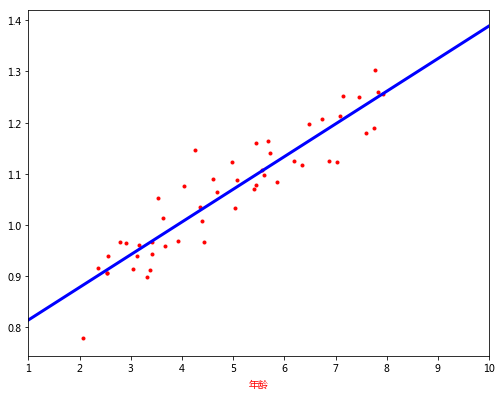

In [38]:
# 引入模块环境
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 1. 描述变量(值需要定义两个占位符X, Y)
X = tf.placeholder(dtype=tf.float32, shape=[None, 2])   # 数据是一维，加上解决 1
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1])

# 2. 描述线性回归(线性求解公式)
S1 = tf.transpose(X)     # 转置
S2 = tf.matmul(S1, X)    # 内积
S3 = tf.matrix_inverse(S2)   # 逆矩阵
S4 = tf.matmul(S3, S1)    # 内积
W = tf.matmul(S4, Y)   # 内积


# 3. 构造会话环境
session = tf.Session()

# 4. 初始化变量
all_vars = tf.global_variables_initializer()
session.run(all_vars)
# 5. 执行操作，得到结果（训练的线性系数）
# 加载数据(数据格式：特别注意)
x_data = np.loadtxt('ex2x.dat')
y_data = np.loadtxt('ex2y.dat')

# 数据格式化
x = np.zeros(shape=[x_data.shape[0], 2] , dtype=np.float32)
x[:, 0] = x_data
x[:, 1] = 1 

y = y_data.reshape([y_data.shape[0], 1])

w = session.run(
    W, 
    feed_dict={
        X: x,
        Y: y
    }
)

# 6. 可视化分类效果（使用训练集看效果）
figure = plt.figure('Tensorflow实现', figsize=(8, 6))
ax = figure. add_axes([0.1, 0.1, 0.8, 0.8])

# 可视化样本点
ax.scatter(x_data, y_data, s=3**2, color='#FF0000' )
ax.set_xlim(1, 10)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax.set_xlabel('年龄',color=(1,0,0,1))

# 可视化预测直线
line_space = np.linspace(1,10, 100)
line_x = np.zeros(shape=[100, 2] , dtype=np.float32)
line_x[:, 0]=line_space
line_x[:,  1] =1
line_y = np.matmul(line_x, w)
ax.plot(line_space, line_y, color='#0000FF', linewidth=3)

plt.show()

## 逻辑回归tensorflow的实现

- 随机梯度下降：
    - 分类模型
        - $y = S(xW)$
    - 损失模型(交叉熵)
        - $L(W) = \sum (y_1 log y_2 + (1-y_2) log(1-y_1) )$

- Tensorflow封装编程模式
    - 在分类模型下，损失函数最小
         - 分类模型 + 训练样本的标签 -> 损失函数
         - 优化器，使得损失函数最小（学习率）

In [37]:
s = """
tf.losses.sigmoid_cross_entropy(
    multi_class_labels,    # 训练样本的标签y（已知的分类）
    logits,   # 使用逻辑回归分类模型计算出来的y
    weights=1.0,
    label_smoothing=0,
    scope=None,
    loss_collection=tf.GraphKeys.LOSSES,
    reduction=Reduction.SUM_BY_NONZERO_WEIGHTS
)

#  tf.train.GradientDescentOptimizer  
__init__(
    learning_rate,        # 学习率
    use_locking=False,   
    name='GradientDescent'
)

minimize(
    loss,                          # 损失函数
    global_step=None,
    var_list=None,
    gate_gradients=GATE_OP,
    aggregation_method=None,
    colocate_gradients_with_ops=False,
    name=None,
    grad_loss=None
)

# S函数
tf.math.sigmoid(
    x,
    name=None
)
"""

In [55]:
import numpy as np
import sklearn.datasets as ds
import tensorflow as tf

# 鸢尾花

FEATURE_NUM = 4
OUTPUT_NUM = 1
# 1. 描述量（分类模型，损失函数，优化器）
# 1.1.  y_o = S(xW+b)
# 1.2. loss = f(y_o,  y)
# 定义输入（样本集合，样本标签）
x = tf.placeholder(dtype=tf.float32, shape=[None, FEATURE_NUM])
y = tf.placeholder(dtype=tf.float32, shape=[None, OUTPUT_NUM])

# w，b需要训练得到（首先初始化一个数据）: 常量
w_v = tf.random_uniform(shape=[FEATURE_NUM, OUTPUT_NUM] , minval=-0.01, maxval=0.01, dtype=tf.float32)
b_v = tf.random_uniform(shape=[OUTPUT_NUM], minval=-0.01, maxval=0.01, dtype=tf.float32)

w = tf.Variable(w_v)     # 变量才可训练
b = tf.Variable(b_v)
# 2. 描述操作（分类模型，损失函数描述，优化器描述）
y_o = tf.matmul(x, w) + b    # 线性输出

# 预测输出(概率输出)
y_p = tf.sigmoid(y_o)

# 损失函数
loss = tf.losses.sigmoid_cross_entropy(y, y_o)     # 可以使用y_p

# 定义优化器
optimizer = tf.train.GradientDescentOptimizer(0.02)
# 训练操作
trainer = optimizer.minimize(loss)

# 3. 构建tensorflow执行环境
session = tf.Session()

# 4. 初始化全局变量
all_vars = tf.initializers.global_variables()
session.run(all_vars)

# 5. 执行算法
# 训练\
data, target = ds.load_iris(return_X_y=True)
X = data[0:100, :]   # 取前面两类鸢尾花
Y = target[0:100]

# 一定要确保：输入数据与占位符shape保持一致
Y = Y.reshape( (Y.shape[0],  OUTPUT_NUM))

train_num =10000
for i in range(train_num):
    session.run(trainer, feed_dict={x:X, y:Y})
    # 获取训练以后w与b
    re_w = session.run(w)
    re_b = session.run(b)
    re_loss = session.run(loss, feed_dict={x: X, y: Y})
    print(F'第{i:04d}次训练:',re_w.T, '\t', re_loss)


第0000次训练: [[ 0.01392446 -0.01095754  0.00795232  0.00195233]] 	 0.6825899
第0001次训练: [[ 0.0168254  -0.01511639  0.02088635  0.00705796]] 	 0.6719428
第0002次训练: [[ 0.01847149 -0.01991412  0.03302354  0.01192608]] 	 0.6622832
第0003次训练: [[ 0.01918674 -0.02517247  0.04454365  0.01660748]] 	 0.65324396
第0004次训练: [[ 0.01921259 -0.03075875  0.05558087  0.0211401 ]] 	 0.64461917
第0005次训练: [[ 0.01872877 -0.03657427  0.06623532  0.02555227]] 	 0.6362924
第0006次训练: [[ 0.01786918 -0.04254562  0.07658178  0.02986517]] 	 0.62819743
第0007次训练: [[ 0.01673362 -0.04861821  0.0866762   0.03409468]] 	 0.62029576
第0008次训练: [[ 0.01539657 -0.05475138  0.09656057  0.03825273]] 	 0.61256486
第0009次训练: [[ 0.01391363 -0.06091491  0.10626645  0.04234833]] 	 0.60499054
第0010次训练: [[ 0.01232637 -0.06708634  0.11581767  0.04638832]] 	 0.5975638
第0011次训练: [[ 0.01066586 -0.07324899  0.12523231  0.05037789]] 	 0.5902784
第0012次训练: [[ 0.00895527 -0.07939056  0.13452409  0.05432103]] 	 0.5831295
第0013次训练: [[ 0.00721197 -0.08550

第0131次训练: [[-0.13033523 -0.5493791   0.8344471   0.35409707]] 	 0.21416645
第0132次训练: [[-0.13107592 -0.55192417  0.8382748   0.35574818]] 	 0.21293941
第0133次训练: [[-0.13181242 -0.5544552   0.8420818   0.3573905 ]] 	 0.21172565
第0134次训练: [[-0.1325448 -0.5569724  0.8458683  0.3590241]] 	 0.21052496
第0135次训练: [[-0.13327308 -0.55947584  0.84963447  0.3606491 ]] 	 0.20933715
第0136次训练: [[-0.1339973  -0.5619657   0.85338056  0.3622656 ]] 	 0.20816197
第0137次训练: [[-0.13471752 -0.56444216  0.8571067   0.36387363]] 	 0.20699935
第0138次训练: [[-0.13543376 -0.56690526  0.86081314  0.3654733 ]] 	 0.20584898
第0139次训练: [[-0.13614608 -0.5693552   0.86450005  0.36706468]] 	 0.20471074
第0140次训练: [[-0.1368545  -0.57179207  0.8681676   0.36864784]] 	 0.20358445
第0141次训练: [[-0.13755907 -0.574216    0.871816    0.3702229 ]] 	 0.20246989
第0142次训练: [[-0.13825983 -0.5766272   0.8754454   0.3717899 ]] 	 0.2013669
第0143次训练: [[-0.1389568  -0.5790257   0.87905604  0.37334892]] 	 0.2002754
第0144次训练: [[-0.13965003 -0.5814

第0256次训练: [[-0.20005864 -0.79037297  1.1982327   0.5117407 ]] 	 0.123426884
第0257次训练: [[-0.20048507 -0.7918547   1.2004768   0.5127179 ]] 	 0.12300567
第0258次训练: [[-0.20091002 -0.7933313   1.2027133   0.5136919 ]] 	 0.12258731
第0259次训练: [[-0.20133351 -0.79480296  1.2049422   0.5146627 ]] 	 0.122171745
第0260次训练: [[-0.20175554 -0.7962696   1.2071637   0.5156303 ]] 	 0.12175897
第0261次训练: [[-0.20217612 -0.7977313   1.2093778   0.5165947 ]] 	 0.121348955
第0262次训练: [[-0.20259526 -0.7991881   1.2115844   0.51755595]] 	 0.12094167
第0263次训练: [[-0.20301297 -0.80064     1.2137837   0.5185141 ]] 	 0.12053709
第0264次训练: [[-0.20342925 -0.802087    1.2159758   0.5194691 ]] 	 0.12013517
第0265次训练: [[-0.20384412 -0.8035292   1.2181606   0.52042097]] 	 0.11973593
第0266次训练: [[-0.20425758 -0.80496657  1.2203382   0.5213698 ]] 	 0.119339295
第0267次训练: [[-0.20466965 -0.80639917  1.2225087   0.5223156 ]] 	 0.118945286
第0268次训练: [[-0.20508035 -0.80782706  1.2246721   0.5232584 ]] 	 0.11855383
第0269次训练: [[-0.20548

第0406次训练: [[-0.25150555 -0.9697172   1.47039     0.63072544]] 	 0.08152953
第0407次训练: [[-0.2517843 -0.970692   1.471872   0.631376 ]] 	 0.081345834
第0408次训练: [[-0.25206238 -0.9716645   1.4733506   0.6320251 ]] 	 0.081162974
第0409次训练: [[-0.25233984 -0.9726348   1.4748259   0.6326728 ]] 	 0.08098096
第0410次训练: [[-0.25261664 -0.9736029   1.4762977   0.633319  ]] 	 0.08079975
第0411次训练: [[-0.2528928 -0.9745688  1.4777663  0.6339638]] 	 0.080619365
第0412次训练: [[-0.2531683 -0.9755325  1.4792316  0.6346072]] 	 0.08043978
第0413次训练: [[-0.2534432  -0.97649395  1.4806936   0.63524914]] 	 0.08026103
第0414次训练: [[-0.25371748 -0.9774533   1.4821522   0.6358897 ]] 	 0.08008307
第0415次训练: [[-0.2539911  -0.9784104   1.4836076   0.63652885]] 	 0.0799059
第0416次训练: [[-0.2542641 -0.9793654  1.4850599  0.6371666]] 	 0.07972953
第0417次训练: [[-0.25453648 -0.98031825  1.4865087   0.63780296]] 	 0.07955393
第0418次训练: [[-0.25480825 -0.98126894  1.4879544   0.6384379 ]] 	 0.07937913
第0419次训练: [[-0.2550794 -0.9822175  1.48

第0529次训练: [[-0.2816665  -1.0753759   1.6311846   0.70148903]] 	 0.063856915
第0530次训练: [[-0.28188282 -1.0761352   1.632341    0.7019993 ]] 	 0.06374503
第0531次训练: [[-0.28209877 -1.076893    1.6334955   0.7025087 ]] 	 0.06363354
第0532次训练: [[-0.28231433 -1.0776495   1.6346478   0.7030172 ]] 	 0.06352245
第0533次训练: [[-0.28252947 -1.0784045   1.6357982   0.70352477]] 	 0.06341176
第0534次训练: [[-0.28274423 -1.0791583   1.6369464   0.70403147]] 	 0.06330146
第0535次训练: [[-0.2829586  -1.0799108   1.6380926   0.70453733]] 	 0.063191555
第0536次训练: [[-0.28317258 -1.0806619   1.6392368   0.7050423 ]] 	 0.06308203
第0537次训练: [[-0.28338617 -1.0814116   1.640379    0.7055464 ]] 	 0.06297291
第0538次训练: [[-0.2835994 -1.08216    1.6415191  0.7060496]] 	 0.062864155
第0539次训练: [[-0.28381225 -1.0829071   1.6426573   0.70655197]] 	 0.06275579
第0540次训练: [[-0.28402472 -1.0836529   1.6437935   0.7070535 ]] 	 0.0626478
第0541次训练: [[-0.2842368 -1.0843973  1.6449276  0.7075541]] 	 0.062540196
第0542次训练: [[-0.28444847 -1.085

第0692次训练: [[-0.31254947 -1.1839447   1.7967155   0.7747235 ]] 	 0.04971566
第0693次训练: [[-0.31271604 -1.1845313   1.7976106   0.7751206 ]] 	 0.04964861
第0694次训练: [[-0.31288236 -1.1851171   1.7985046   0.7755172 ]] 	 0.049581733
第0695次训练: [[-0.31304848 -1.1857021   1.7993972   0.7759133 ]] 	 0.049515057
第0696次训练: [[-0.31321436 -1.1862862   1.8002887   0.77630883]] 	 0.049448557
第0697次训练: [[-0.31338    -1.1868695   1.8011789   0.77670383]] 	 0.04938224
第0698次训练: [[-0.3135454 -1.1874521  1.8020679  0.7770983]] 	 0.049316116
第0699次训练: [[-0.31371057 -1.1880338   1.8029556   0.7774922 ]] 	 0.049250163
第0700次训练: [[-0.3138755 -1.1886147  1.8038422  0.7778856]] 	 0.049184393
第0701次训练: [[-0.3140402  -1.1891948   1.8047276   0.77827847]] 	 0.049118802
第0702次训练: [[-0.3142047  -1.1897742   1.8056117   0.77867085]] 	 0.049053386
第0703次训练: [[-0.31436893 -1.1903527   1.8064946   0.7790627 ]] 	 0.048988152
第0704次训练: [[-0.31453297 -1.1909304   1.8073763   0.779454  ]] 	 0.048923105
第0705次训练: [[-0.31469676

第0832次训练: [[-0.3338376 -1.2590032  1.9113215  0.8256692]] 	 0.041843366
第0833次训练: [[-0.3339766  -1.2594938   1.9120712   0.82600313]] 	 0.04179633
第0834次训练: [[-0.33411545 -1.2599839   1.91282     0.8263367 ]] 	 0.04174939
第0835次训练: [[-0.33425412 -1.2604734   1.9135679   0.8266698 ]] 	 0.04170258
第0836次训练: [[-0.33439264 -1.2609624   1.914315    0.8270026 ]] 	 0.04165586
第0837次训练: [[-0.33453098 -1.2614508   1.9150611   0.827335  ]] 	 0.041609265
第0838次训练: [[-0.33466917 -1.2619386   1.9158064   0.827667  ]] 	 0.041562762
第0839次训练: [[-0.3348072  -1.2624258   1.9165509   0.82799864]] 	 0.041516375
第0840次训练: [[-0.33494505 -1.2629125   1.9172945   0.8283299 ]] 	 0.041470096
第0841次训练: [[-0.33508274 -1.2633986   1.9180373   0.82866085]] 	 0.041423913
第0842次训练: [[-0.33522028 -1.2638842   1.9187793   0.82899135]] 	 0.041377835
第0843次训练: [[-0.33535767 -1.2643692   1.9195203   0.8293215 ]] 	 0.04133187
第0844次训练: [[-0.33549488 -1.2648537   1.9202604   0.8296513 ]] 	 0.04128601
第0845次训练: [[-0.3356319

第0971次训练: [[-0.35173422 -1.3222402   2.0079799   0.8687965 ]] 	 0.036206134
第0972次训练: [[-0.35185358 -1.3226624   2.0086255   0.8690851 ]] 	 0.036171243
第0973次训练: [[-0.35197282 -1.3230841   2.0092704   0.8693733 ]] 	 0.03613641
第0974次训练: [[-0.35209194 -1.3235054   2.0099146   0.86966133]] 	 0.036101658
第0975次训练: [[-0.35221094 -1.3239263   2.0105584   0.86994904]] 	 0.036066968
第0976次训练: [[-0.35232982 -1.3243468   2.0112014   0.87023646]] 	 0.03603235
第0977次训练: [[-0.35244858 -1.3247669   2.0118437   0.87052363]] 	 0.035997804
第0978次训练: [[-0.35256723 -1.3251865   2.0124855   0.8708105 ]] 	 0.035963327
第0979次训练: [[-0.35268575 -1.3256058   2.0131266   0.8710971 ]] 	 0.035928905
第0980次训练: [[-0.35280415 -1.3260245   2.013767    0.8713834 ]] 	 0.03589457
第0981次训练: [[-0.35292244 -1.326443    2.014407    0.8716695 ]] 	 0.035860285
第0982次训练: [[-0.3530406 -1.3268609  2.0150461  0.8719552]] 	 0.03582608
第0983次训练: [[-0.35315865 -1.3272785   2.0156846   0.8722407 ]] 	 0.035791937
第0984次训练: [[-0.35327

第1097次训练: [[-0.36589137 -1.3723514   2.084639    0.90310794]] 	 0.032296184
第1098次训练: [[-0.36599717 -1.3727262   2.0852127   0.903365  ]] 	 0.03226863
第1099次训练: [[-0.36610287 -1.3731006   2.0857856   0.90362185]] 	 0.032241136
第1100次训练: [[-0.3662085  -1.3734747   2.086358    0.90387845]] 	 0.032213684
第1101次训练: [[-0.366314   -1.3738484   2.08693     0.90413487]] 	 0.032186285
第1102次训练: [[-0.3664194  -1.3742219   2.0875015   0.90439105]] 	 0.032158937
第1103次训练: [[-0.36652473 -1.374595    2.0880725   0.904647  ]] 	 0.03213163
第1104次训练: [[-0.36662996 -1.3749678   2.088643    0.90490276]] 	 0.032104373
第1105次训练: [[-0.3667351 -1.3753402  2.0892131  0.9051583]] 	 0.032077167
第1106次训练: [[-0.36684015 -1.3757124   2.0897827   0.90541357]] 	 0.03205
第1107次训练: [[-0.3669451 -1.3760842  2.0903518  0.9056687]] 	 0.032022882
第1108次训练: [[-0.36704993 -1.3764557   2.0909202   0.90592355]] 	 0.031995818
第1109次训练: [[-0.3671547 -1.3768268  2.0914881  0.9061782]] 	 0.031968802
第1110次训练: [[-0.36725935 -1.377

第1230次训练: [[-0.37918597 -1.4194797   2.156785    0.9354883 ]] 	 0.02901498
第1231次训练: [[-0.37928045 -1.4198148   2.157298    0.9357189 ]] 	 0.028992923
第1232次训练: [[-0.37937483 -1.4201497   2.157811    0.9359493 ]] 	 0.028970897
第1233次训练: [[-0.37946916 -1.4204843   2.1583233   0.93617964]] 	 0.028948905
第1234次训练: [[-0.3795634 -1.4208186  2.1588352  0.9364098]] 	 0.028926957
第1235次训练: [[-0.37965757 -1.4211526   2.1593468   0.9366397 ]] 	 0.028905032
第1236次训练: [[-0.37975165 -1.4214864   2.159858    0.9368695 ]] 	 0.028883142
第1237次训练: [[-0.37984568 -1.4218199   2.1603687   0.9370991 ]] 	 0.028861292
第1238次训练: [[-0.37993962 -1.4221532   2.1608791   0.9373285 ]] 	 0.02883947
第1239次训练: [[-0.3800335  -1.4224862   2.161389    0.93755776]] 	 0.028817685
第1240次训练: [[-0.38012728 -1.4228189   2.1618986   0.9377868 ]] 	 0.028795933
第1241次训练: [[-0.380221  -1.4231514  2.1624079  0.9380157]] 	 0.02877422
第1242次训练: [[-0.38031465 -1.4234836   2.1629167   0.9382444 ]] 	 0.028752537
第1243次训练: [[-0.38040823

第1356次训练: [[-0.39052808 -1.4597366   2.2184517   0.96323454]] 	 0.026484782
第1357次训练: [[-0.39061385 -1.4600412   2.2189186   0.9634448 ]] 	 0.02646653
第1358次训练: [[-0.39069957 -1.4603456   2.219385    0.96365494]] 	 0.0264483
第1359次训练: [[-0.39078522 -1.4606498   2.219851    0.9638649 ]] 	 0.026430102
第1360次训练: [[-0.3908708  -1.4609538   2.2203166   0.96407473]] 	 0.026411926
第1361次训练: [[-0.39095634 -1.4612576   2.220782    0.9642844 ]] 	 0.026393779
第1362次训练: [[-0.39104182 -1.4615611   2.2212472   0.96449393]] 	 0.026375651
第1363次训练: [[-0.3911272 -1.4618644  2.2217119  0.9647033]] 	 0.02635756
第1364次训练: [[-0.39121252 -1.4621674   2.2221763   0.96491253]] 	 0.02633949
第1365次训练: [[-0.3912978 -1.4624703  2.2226405  0.9651216]] 	 0.026321443
第1366次训练: [[-0.391383  -1.462773   2.2231042  0.9653306]] 	 0.026303422
第1367次训练: [[-0.39146814 -1.4630754   2.2235677   0.9655394 ]] 	 0.026285429
第1368次训练: [[-0.39155322 -1.4633776   2.2240307   0.9657481 ]] 	 0.026267461
第1369次训练: [[-0.39163825 -1.46

第1476次训练: [[-0.40039754 -1.494807    2.2722003   0.9874723 ]] 	 0.024466397
第1477次训练: [[-0.4004764 -1.4950874  2.2726302  0.9876663]] 	 0.024450917
第1478次训练: [[-0.4005552 -1.4953675  2.2730596  0.9878602]] 	 0.024435459
第1479次训练: [[-0.40063393 -1.4956475   2.2734888   0.988054  ]] 	 0.024420023
第1480次训练: [[-0.40071264 -1.4959273   2.2739177   0.98824763]] 	 0.024404604
第1481次训练: [[-0.4007913  -1.496207    2.2743464   0.98844117]] 	 0.024389206
第1482次训练: [[-0.40086988 -1.4964864   2.2747748   0.9886346 ]] 	 0.024373824
第1483次训练: [[-0.4009484 -1.4967656  2.275203   0.9888278]] 	 0.024358466
第1484次训练: [[-0.4010269  -1.4970447   2.2756307   0.98902094]] 	 0.024343133
第1485次训练: [[-0.40110534 -1.4973235   2.2760582   0.98921394]] 	 0.024327815
第1486次训练: [[-0.40118372 -1.4976022   2.2764854   0.9894068 ]] 	 0.02431252
第1487次训练: [[-0.40126204 -1.4978807   2.2769125   0.9895996 ]] 	 0.024297243
第1488次训练: [[-0.40134034 -1.498159    2.2773392   0.9897922 ]] 	 0.024281984
第1489次训练: [[-0.40141857 -

第1617次训练: [[-0.4110248 -1.5326096  2.3301656  1.0136688]] 	 0.022467896
第1618次训练: [[-0.41109684 -1.532866    2.3305588   1.0138468 ]] 	 0.022454934
第1619次训练: [[-0.41116884 -1.5331223   2.3309517   1.0140246 ]] 	 0.022441989
第1620次训练: [[-0.4112408 -1.5333784  2.3313444  1.0142024]] 	 0.022429064
第1621次训练: [[-0.4113127 -1.5336343  2.331737   1.01438  ]] 	 0.02241614
第1622次训练: [[-0.41138455 -1.5338901   2.3321295   1.0145575 ]] 	 0.022403235
第1623次训练: [[-0.41145638 -1.5341457   2.3325217   1.0147349 ]] 	 0.022390349
第1624次训练: [[-0.41152814 -1.5344012   2.3329136   1.0149121 ]] 	 0.022377476
第1625次训练: [[-0.41159987 -1.5346565   2.3333054   1.0150893 ]] 	 0.022364622
第1626次训练: [[-0.41167155 -1.5349116   2.3336968   1.0152664 ]] 	 0.022351779
第1627次训练: [[-0.4117432 -1.5351666  2.334088   1.0154434]] 	 0.022338955
第1628次训练: [[-0.4118148 -1.5354215  2.334479   1.0156204]] 	 0.022326145
第1629次训练: [[-0.41188636 -1.5356762   2.3348699   1.0157971 ]] 	 0.022313347
第1630次训练: [[-0.4119579 -1.5359308

第1742次训练: [[-0.41970453 -1.5635138   2.3775775   1.0351397 ]] 	 0.020959806
第1743次训练: [[-0.41977143 -1.5637522   2.3779433   1.0353055 ]] 	 0.020948589
第1744次训练: [[-0.4198383 -1.5639904  2.3783088  1.0354712]] 	 0.020937385
第1745次训练: [[-0.41990516 -1.5642284   2.378674    1.0356368 ]] 	 0.020926202
第1746次训练: [[-0.41997197 -1.5644664   2.3790393   1.0358024 ]] 	 0.02091502
第1747次训练: [[-0.42003873 -1.5647042   2.3794043   1.0359678 ]] 	 0.020903852
第1748次训练: [[-0.42010546 -1.5649419   2.379769    1.0361332 ]] 	 0.020892696
第1749次训练: [[-0.42017215 -1.5651795   2.3801336   1.0362984 ]] 	 0.020881558
第1750次训练: [[-0.42023882 -1.5654169   2.380498    1.0364636 ]] 	 0.020870425
第1751次训练: [[-0.42030543 -1.5656543   2.380862    1.0366287 ]] 	 0.020859312
第1752次训练: [[-0.420372  -1.5658915  2.3812258  1.0367937]] 	 0.020848209
第1753次训练: [[-0.42043856 -1.5661285   2.3815897   1.0369586 ]] 	 0.020837117
第1754次训练: [[-0.42050505 -1.5663654   2.3819532   1.0371234 ]] 	 0.020826034
第1755次训练: [[-0.420571

第1888次训练: [[-0.42909312 -1.5969698   2.428928    1.0584403 ]] 	 0.019444766
第1889次训练: [[-0.4291549 -1.5971901  2.4292662  1.058594 ]] 	 0.019435171
第1890次训练: [[-0.42921665 -1.5974103   2.4296043   1.0587475 ]] 	 0.01942559
第1891次训练: [[-0.42927837 -1.5976304   2.4299421   1.058901  ]] 	 0.01941602
第1892次训练: [[-0.42934006 -1.5978503   2.4302797   1.0590544 ]] 	 0.01940646
第1893次训练: [[-0.42940173 -1.5980701   2.4306173   1.0592077 ]] 	 0.019396909
第1894次训练: [[-0.42946336 -1.5982898   2.4309547   1.0593609 ]] 	 0.019387363
第1895次训练: [[-0.42952496 -1.5985094   2.4312918   1.059514  ]] 	 0.019377833
第1896次训练: [[-0.42958653 -1.5987289   2.4316287   1.0596671 ]] 	 0.019368315
第1897次训练: [[-0.42964807 -1.5989482   2.4319656   1.0598202 ]] 	 0.019358799
第1898次训练: [[-0.42970958 -1.5991675   2.4323022   1.0599731 ]] 	 0.0193493
第1899次训练: [[-0.42977107 -1.5993867   2.4326386   1.060126  ]] 	 0.019339805
第1900次训练: [[-0.42983252 -1.5996058   2.432975    1.0602788 ]] 	 0.019330319
第1901次训练: [[-0.429893

第2008次训练: [[-0.43628582 -1.6226227   2.468316    1.0763462 ]] 	 0.018360227
第2009次训练: [[-0.43634397 -1.6228302   2.4686346   1.0764911 ]] 	 0.018351719
第2010次训练: [[-0.43640208 -1.6230375   2.468953    1.076636  ]] 	 0.018343218
第2011次训练: [[-0.43646017 -1.6232446   2.4692712   1.0767807 ]] 	 0.018334724
第2012次训练: [[-0.43651822 -1.6234517   2.4695892   1.0769254 ]] 	 0.018326242
第2013次训练: [[-0.43657625 -1.6236587   2.469907    1.07707   ]] 	 0.018317768
第2014次训练: [[-0.43663424 -1.6238656   2.4702249   1.0772146 ]] 	 0.018309297
第2015次训练: [[-0.4366922 -1.6240724  2.4705424  1.0773591]] 	 0.01830084
第2016次训练: [[-0.43675014 -1.6242791   2.4708598   1.0775036 ]] 	 0.01829239
第2017次训练: [[-0.43680805 -1.6244857   2.471177    1.0776479 ]] 	 0.018283946
第2018次训练: [[-0.43686593 -1.6246922   2.4714942   1.0777922 ]] 	 0.018275514
第2019次训练: [[-0.43692377 -1.6248986   2.471811    1.0779364 ]] 	 0.01826709
第2020次训练: [[-0.4369816 -1.6251049  2.472128   1.0780805]] 	 0.018258672
第2021次训练: [[-0.43703938

第2143次训练: [[-0.44388545 -1.6497456   2.5099776   1.0953169 ]] 	 0.017281497
第2144次训练: [[-0.44393995 -1.6499401   2.5102766   1.0954531 ]] 	 0.017274002
第2145次训练: [[-0.44399443 -1.6501347   2.5105753   1.0955893 ]] 	 0.017266512
第2146次训练: [[-0.44404888 -1.6503291   2.510874    1.0957254 ]] 	 0.017259028
第2147次训练: [[-0.4441033 -1.6505234  2.5111725  1.0958614]] 	 0.017251551
第2148次训练: [[-0.44415772 -1.6507176   2.511471    1.0959975 ]] 	 0.017244082
第2149次训练: [[-0.4442121 -1.6509118  2.5117693  1.0961334]] 	 0.017236615
第2150次训练: [[-0.44426647 -1.6511059   2.5120676   1.0962692 ]] 	 0.017229157
第2151次训练: [[-0.4443208 -1.6512998  2.5123656  1.096405 ]] 	 0.01722171
第2152次训练: [[-0.4443751 -1.6514937  2.5126634  1.0965408]] 	 0.017214267
第2153次训练: [[-0.44442937 -1.6516875   2.5129611   1.0966765 ]] 	 0.017206833
第2154次训练: [[-0.44448364 -1.6518812   2.5132587   1.0968121 ]] 	 0.0171994
第2155次训练: [[-0.44453788 -1.6520748   2.5135562   1.0969477 ]] 	 0.017191974
第2156次训练: [[-0.4445921 -1.65226

第2262次训练: [[-0.45020124 -1.6723005   2.544634    1.1111226 ]] 	 0.016434584
第2263次训练: [[-0.45025292 -1.672485    2.5449178   1.1112521 ]] 	 0.016427834
第2264次训练: [[-0.45030457 -1.6726695   2.5452013   1.1113815 ]] 	 0.016421089
第2265次训练: [[-0.4503562 -1.672854   2.5454848  1.1115109]] 	 0.01641435
第2266次训练: [[-0.45040777 -1.6730382   2.545768    1.1116402 ]] 	 0.016407616
第2267次训练: [[-0.45045936 -1.6732225   2.5460513   1.1117694 ]] 	 0.01640089
第2268次训练: [[-0.45051092 -1.6734067   2.5463343   1.1118987 ]] 	 0.016394166
第2269次训练: [[-0.45056245 -1.6735908   2.5466173   1.1120278 ]] 	 0.016387451
第2270次训练: [[-0.45061395 -1.6737748   2.5469      1.1121569 ]] 	 0.016380742
第2271次训练: [[-0.45066544 -1.6739588   2.5471828   1.1122859 ]] 	 0.016374037
第2272次训练: [[-0.4507169 -1.6741426  2.5474653  1.1124148]] 	 0.01636734
第2273次训练: [[-0.45076835 -1.6743264   2.5477479   1.1125437 ]] 	 0.016360644
第2274次训练: [[-0.45081976 -1.6745101   2.5480301   1.1126726 ]] 	 0.01635396
第2275次训练: [[-0.45087117 

第2400次训练: [[-0.4571266 -1.6970454  2.5826705  1.1284956]] 	 0.01555477
第2401次训练: [[-0.4571753 -1.6972196  2.5829382  1.128618 ]] 	 0.015548753
第2402次训练: [[-0.457224  -1.6973938  2.583206   1.1287403]] 	 0.01554274
第2403次训练: [[-0.4572727 -1.6975678  2.5834734  1.1288626]] 	 0.015536733
第2404次训练: [[-0.45732138 -1.6977417   2.583741    1.1289849 ]] 	 0.015530731
第2405次训练: [[-0.45737   -1.6979157  2.5840082  1.1291071]] 	 0.015524736
第2406次训练: [[-0.45741865 -1.6980895   2.5842755   1.1292293 ]] 	 0.015518742
第2407次训练: [[-0.45746726 -1.6982633   2.5845425   1.1293514 ]] 	 0.015512753
第2408次训练: [[-0.45751584 -1.698437    2.5848095   1.1294734 ]] 	 0.015506773
第2409次训练: [[-0.4575644 -1.6986105  2.5850763  1.1295955]] 	 0.015500793
第2410次训练: [[-0.45761296 -1.6987841   2.5853431   1.1297175 ]] 	 0.0154948225
第2411次训练: [[-0.45766148 -1.6989576   2.58561     1.1298394 ]] 	 0.015488854
第2412次训练: [[-0.45771   -1.699131   2.5858765  1.1299613]] 	 0.0154828895
第2413次训练: [[-0.4577585 -1.6993043  2.586

第2542次训练: [[-0.46385276 -1.7210941   2.6196475   1.145412  ]] 	 0.014746514
第2543次训练: [[-0.4638988 -1.7212588  2.6199007  1.1455278]] 	 0.014741131
第2544次训练: [[-0.46394482 -1.7214234   2.620154    1.1456437 ]] 	 0.0147357555
第2545次训练: [[-0.46399084 -1.7215879   2.6204069   1.1457596 ]] 	 0.014730383
第2546次训练: [[-0.46403682 -1.7217524   2.6206598   1.1458753 ]] 	 0.014725013
第2547次训练: [[-0.46408278 -1.7219168   2.6209126   1.1459911 ]] 	 0.014719648
第2548次训练: [[-0.46412873 -1.7220812   2.6211653   1.1461068 ]] 	 0.0147142885
第2549次训练: [[-0.46417466 -1.7222455   2.621418    1.1462225 ]] 	 0.0147089325
第2550次训练: [[-0.46422058 -1.7224096   2.6216705   1.1463381 ]] 	 0.014703581
第2551次训练: [[-0.46426648 -1.7225738   2.621923    1.1464537 ]] 	 0.014698233
第2552次训练: [[-0.46431234 -1.7227378   2.6221752   1.1465693 ]] 	 0.014692887
第2553次训练: [[-0.4643582 -1.7229018  2.6224275  1.1466848]] 	 0.014687549
第2554次训练: [[-0.46440405 -1.7230657   2.6226797   1.1468003 ]] 	 0.014682212
第2555次训练: [[-0.46

第2669次训练: [[-0.469561  -1.7415131  2.6510549  1.1598008]] 	 0.014094499
第2670次训练: [[-0.46960488 -1.7416701   2.6512964   1.1599115 ]] 	 0.014089602
第2671次训练: [[-0.46964875 -1.741827    2.651538    1.1600221 ]] 	 0.014084711
第2672次训练: [[-0.4696926 -1.7419839  2.6517792  1.1601328]] 	 0.014079823
第2673次训练: [[-0.46973643 -1.7421407   2.6520205   1.1602434 ]] 	 0.014074938
第2674次训练: [[-0.46978024 -1.7422974   2.6522615   1.1603539 ]] 	 0.014070059
第2675次训练: [[-0.46982402 -1.742454    2.6525025   1.1604644 ]] 	 0.014065182
第2676次训练: [[-0.4698678 -1.7426107  2.6527436  1.1605749]] 	 0.014060309
第2677次训练: [[-0.46991155 -1.7427672   2.6529844   1.1606853 ]] 	 0.014055438
第2678次训练: [[-0.4699553 -1.7429237  2.6532252  1.1607957]] 	 0.014050572
第2679次训练: [[-0.46999902 -1.7430803   2.653466    1.1609061 ]] 	 0.01404571
第2680次训练: [[-0.47004274 -1.7432367   2.6537066   1.1610163 ]] 	 0.014040848
第2681次训练: [[-0.47008643 -1.7433931   2.653947    1.1611266 ]] 	 0.014035994
第2682次训练: [[-0.47013012 -1.74

第2796次训练: [[-0.47500712 -1.761003    2.6810412   1.1735568 ]] 	 0.013500066
第2797次训练: [[-0.47504902 -1.761153    2.681272    1.1736628 ]] 	 0.013495594
第2798次训练: [[-0.47509092 -1.761303    2.6815028   1.1737688 ]] 	 0.013491123
第2799次训练: [[-0.4751328 -1.7614528  2.6817334  1.1738746]] 	 0.013486657
第2800次训练: [[-0.47517467 -1.7616026   2.681964    1.1739805 ]] 	 0.013482194
第2801次训练: [[-0.4752165 -1.7617525  2.6821945  1.1740863]] 	 0.013477734
第2802次训练: [[-0.47525835 -1.7619022   2.6824248   1.1741921 ]] 	 0.013473281
第2803次训练: [[-0.47530016 -1.7620519   2.682655    1.1742978 ]] 	 0.013468823
第2804次训练: [[-0.47534198 -1.7622015   2.6828854   1.1744035 ]] 	 0.013464373
第2805次训练: [[-0.47538376 -1.7623512   2.6831155   1.1745092 ]] 	 0.013459925
第2806次训练: [[-0.47542554 -1.7625006   2.6833456   1.1746148 ]] 	 0.013455481
第2807次训练: [[-0.4754673 -1.7626501  2.6835756  1.1747204]] 	 0.013451039
第2808次训练: [[-0.47550905 -1.7627995   2.6838055   1.174826  ]] 	 0.013446603
第2809次训练: [[-0.47555077 

第2949次训练: [[-0.4812523 -1.7833638  2.715455   1.1893659]] 	 0.012850037
第2950次训练: [[-0.48129207 -1.7835062   2.7156742   1.1894666 ]] 	 0.01284601
第2951次训练: [[-0.48133183 -1.7836485   2.7158933   1.1895673 ]] 	 0.012841975
第2952次训练: [[-0.48137155 -1.7837908   2.7161124   1.189668  ]] 	 0.0128379455
第2953次训练: [[-0.48141128 -1.783933    2.7163312   1.1897687 ]] 	 0.012833922
第2954次训练: [[-0.48145097 -1.7840753   2.71655     1.1898693 ]] 	 0.0128299
第2955次训练: [[-0.48149067 -1.7842174   2.716769    1.1899699 ]] 	 0.01282588
第2956次训练: [[-0.48153034 -1.7843595   2.7169876   1.1900705 ]] 	 0.012821864
第2957次训练: [[-0.48157   -1.7845016  2.7172062  1.190171 ]] 	 0.0128178485
第2958次训练: [[-0.48160964 -1.7846435   2.7174249   1.1902715 ]] 	 0.012813837
第2959次训练: [[-0.48164928 -1.7847855   2.7176435   1.190372  ]] 	 0.012809827
第2960次训练: [[-0.48168892 -1.7849274   2.717862    1.1904725 ]] 	 0.0128058195
第2961次训练: [[-0.48172852 -1.7850692   2.7180803   1.1905729 ]] 	 0.012801815
第2962次训练: [[-0.481768

第3067次训练: [[-0.48585427 -1.7998475   2.7408314   1.2010386 ]] 	 0.012391742
第3068次训练: [[-0.4858925 -1.7999845  2.7410424  1.2011356]] 	 0.012388005
第3069次训练: [[-0.48593074 -1.8001214   2.7412534   1.2012327 ]] 	 0.012384269
第3070次训练: [[-0.48596898 -1.8002584   2.7414641   1.2013297 ]] 	 0.012380537
第3071次训练: [[-0.48600718 -1.8003953   2.741675    1.2014267 ]] 	 0.012376807
第3072次训练: [[-0.4860454 -1.8005321  2.7418857  1.2015237]] 	 0.012373078
第3073次训练: [[-0.48608357 -1.800669    2.7420962   1.2016206 ]] 	 0.012369352
第3074次训练: [[-0.48612174 -1.8008057   2.7423067   1.2017175 ]] 	 0.01236563
第3075次训练: [[-0.48615992 -1.8009424   2.7425172   1.2018144 ]] 	 0.012361909
第3076次训练: [[-0.48619807 -1.8010792   2.7427278   1.2019113 ]] 	 0.012358186
第3077次训练: [[-0.4862362 -1.8012158  2.742938   1.2020081]] 	 0.0123544745
第3078次训练: [[-0.48627433 -1.8013524   2.7431483   1.2021049 ]] 	 0.012350759
第3079次训练: [[-0.48631245 -1.8014889   2.7433586   1.2022017 ]] 	 0.012347046
第3080次训练: [[-0.48635054 

第3195次训练: [[-0.49065286 -1.817041    2.7673073   1.2132307 ]] 	 0.011931781
第3196次训练: [[-0.4906896 -1.8171726  2.76751    1.2133242]] 	 0.011928328
第3197次训练: [[-0.49072632 -1.8173043   2.7677126   1.2134175 ]] 	 0.011924879
第3198次训练: [[-0.49076304 -1.8174359   2.7679152   1.2135109 ]] 	 0.011921431
第3199次训练: [[-0.49079975 -1.8175673   2.768118    1.2136042 ]] 	 0.011917983
第3200次训练: [[-0.49083644 -1.8176988   2.7683203   1.2136976 ]] 	 0.01191454
第3201次训练: [[-0.49087313 -1.8178303   2.7685227   1.2137909 ]] 	 0.011911099
第3202次训练: [[-0.49090979 -1.8179617   2.7687252   1.2138841 ]] 	 0.011907656
第3203次训练: [[-0.49094644 -1.8180931   2.7689276   1.2139773 ]] 	 0.011904219
第3204次训练: [[-0.4909831 -1.8182244  2.7691298  1.2140706]] 	 0.011900782
第3205次训练: [[-0.49101973 -1.8183557   2.769332    1.2141638 ]] 	 0.011897348
第3206次训练: [[-0.49105635 -1.8184869   2.769534    1.2142569 ]] 	 0.011893917
第3207次训练: [[-0.49109298 -1.8186182   2.7697363   1.21435   ]] 	 0.011890485
第3208次训练: [[-0.491129

第3322次训练: [[-0.49523017 -1.833447    2.7925766   1.2248806 ]] 	 0.011509428
第3323次训练: [[-0.4952655 -1.8335737  2.7927718  1.2249706]] 	 0.011506229
第3324次训练: [[-0.49530086 -1.8337004   2.792967    1.2250606 ]] 	 0.011503027
第3325次训练: [[-0.4953362 -1.8338271  2.793162   1.2251506]] 	 0.0114998305
第3326次训练: [[-0.49537152 -1.8339537   2.7933571   1.2252406 ]] 	 0.011496632
第3327次训练: [[-0.49540684 -1.8340803   2.7935522   1.2253306 ]] 	 0.01149344
第3328次训练: [[-0.49544212 -1.8342069   2.7937472   1.2254205 ]] 	 0.011490248
第3329次训练: [[-0.4954774 -1.8343334  2.793942   1.2255104]] 	 0.011487056
第3330次训练: [[-0.4955127 -1.8344599  2.7941368  1.2256002]] 	 0.011483869
第3331次训练: [[-0.49554795 -1.8345864   2.7943316   1.2256901 ]] 	 0.011480681
第3332次训练: [[-0.4955832 -1.8347127  2.7945263  1.2257799]] 	 0.0114774965
第3333次训练: [[-0.49561846 -1.8348391   2.794721    1.2258697 ]] 	 0.011474315
第3334次训练: [[-0.4956537 -1.8349655  2.7949154  1.2259594]] 	 0.0114711365
第3335次训练: [[-0.49568892 -1.8350917

第3444次训练: [[-0.49946752 -1.84864     2.8159833   1.2356827 ]] 	 0.011132164
第3445次训练: [[-0.49950165 -1.8487623   2.816172    1.2357697 ]] 	 0.01112918
第3446次训练: [[-0.49953577 -1.8488846   2.8163602   1.2358568 ]] 	 0.011126199
第3447次训练: [[-0.49956986 -1.8490069   2.8165486   1.2359438 ]] 	 0.011123218
第3448次训练: [[-0.49960396 -1.8491291   2.816737    1.2360308 ]] 	 0.011120237
第3449次训练: [[-0.49963805 -1.8492513   2.8169253   1.2361177 ]] 	 0.011117255
第3450次训练: [[-0.4996721 -1.8493735  2.8171136  1.2362046]] 	 0.011114281
第3451次训练: [[-0.49970618 -1.8494956   2.8173018   1.2362915 ]] 	 0.011111305
第3452次训练: [[-0.49974024 -1.8496177   2.8174899   1.2363784 ]] 	 0.011108333
第3453次训练: [[-0.49977428 -1.8497398   2.817678    1.2364653 ]] 	 0.011105359
第3454次训练: [[-0.4998083 -1.8498619  2.817866   1.2365521]] 	 0.01110239
第3455次训练: [[-0.49984235 -1.8499838   2.818054    1.2366389 ]] 	 0.0110994205
第3456次训练: [[-0.49987635 -1.8501058   2.8182418   1.2367257 ]] 	 0.011096453
第3457次训练: [[-0.499910

第3564次训练: [[-0.5034937 -1.8630793  2.8382335  1.2459617]] 	 0.010785538
第3565次训练: [[-0.5035267 -1.8631977  2.8384159  1.246046 ]] 	 0.010782741
第3566次训练: [[-0.50355965 -1.8633159   2.8385983   1.2461302 ]] 	 0.010779951
第3567次训练: [[-0.5035926 -1.8634342  2.8387804  1.2462145]] 	 0.01077716
第3568次训练: [[-0.5036256 -1.8635525  2.8389626  1.2462987]] 	 0.010774371
第3569次训练: [[-0.50365853 -1.8636706   2.8391447   1.2463828 ]] 	 0.010771585
第3570次训练: [[-0.5036915 -1.8637887  2.8393269  1.246467 ]] 	 0.010768797
第3571次训练: [[-0.50372446 -1.8639069   2.839509    1.2465512 ]] 	 0.010766012
第3572次训练: [[-0.50375736 -1.864025    2.839691    1.2466353 ]] 	 0.010763229
第3573次训练: [[-0.50379026 -1.864143    2.8398728   1.2467195 ]] 	 0.010760449
第3574次训练: [[-0.50382316 -1.864261    2.8400548   1.2468035 ]] 	 0.010757669
第3575次训练: [[-0.50385606 -1.864379    2.8402367   1.2468876 ]] 	 0.010754891
第3576次训练: [[-0.50388896 -1.8644971   2.8404186   1.2469716 ]] 	 0.010752111
第3577次训练: [[-0.50392187 -1.864615

第3684次训练: [[-0.50738853 -1.8770512   2.8597693   1.2559199 ]] 	 0.010460799
第3685次训练: [[-0.5074205 -1.8771658  2.859946   1.2560016]] 	 0.010458177
第3686次训练: [[-0.5074524 -1.8772804  2.8601224  1.2560833]] 	 0.010455561
第3687次训练: [[-0.5074843 -1.8773948  2.8602989  1.2561649]] 	 0.010452944
第3688次训练: [[-0.5075162 -1.8775092  2.8604753  1.2562466]] 	 0.010450329
第3689次训练: [[-0.5075481 -1.8776237  2.8606517  1.2563282]] 	 0.010447712
第3690次训练: [[-0.50758   -1.8777381  2.8608282  1.2564098]] 	 0.010445099
第3691次训练: [[-0.5076119 -1.8778524  2.8610044  1.2564913]] 	 0.010442487
第3692次训练: [[-0.50764376 -1.8779668   2.8611805   1.2565728 ]] 	 0.010439878
第3693次训练: [[-0.50767565 -1.8780811   2.8613567   1.2566544 ]] 	 0.010437271
第3694次训练: [[-0.5077075 -1.8781954  2.861533   1.2567359]] 	 0.010434661
第3695次训练: [[-0.5077393 -1.8783096  2.861709   1.2568175]] 	 0.010432055
第3696次训练: [[-0.50777113 -1.8784238   2.861885    1.2568989 ]] 	 0.010429453
第3697次训练: [[-0.50780296 -1.878538    2.862061   

第3819次训练: [[-0.5116238 -1.8922476  2.8831968  1.2667642]] 	 0.010119133
第3820次训练: [[-0.5116546 -1.8923582  2.8833673  1.2668431]] 	 0.010116692
第3821次训练: [[-0.51168543 -1.8924688   2.8835378   1.266922  ]] 	 0.01011425
第3822次训练: [[-0.51171625 -1.8925793   2.8837082   1.2670009 ]] 	 0.010111809
第3823次训练: [[-0.51174706 -1.8926898   2.8838787   1.2670798 ]] 	 0.01010937
第3824次训练: [[-0.5117779 -1.8928003  2.8840492  1.2671587]] 	 0.010106926
第3825次训练: [[-0.51180863 -1.8929108   2.8842194   1.2672377 ]] 	 0.01010449
第3826次训练: [[-0.5118394 -1.8930212  2.8843896  1.2673165]] 	 0.010102056
第3827次训练: [[-0.51187015 -1.8931316   2.8845599   1.2673953 ]] 	 0.010099621
第3828次训练: [[-0.5119009 -1.893242   2.88473    1.267474 ]] 	 0.010097185
第3829次训练: [[-0.51193166 -1.8933524   2.8849003   1.2675529 ]] 	 0.010094753
第3830次训练: [[-0.5119624 -1.8934627  2.8850703  1.2676316]] 	 0.010092323
第3831次训练: [[-0.51199317 -1.8935729   2.8852403   1.2677104 ]] 	 0.010089893
第3832次训练: [[-0.51202387 -1.8936832   2.

第3960次训练: [[-0.5158929 -1.9075694  2.9068236  1.2777116]] 	 0.009786392
第3961次训练: [[-0.51592267 -1.9076761   2.9069884   1.2777879 ]] 	 0.009784114
第3962次训练: [[-0.5159524 -1.9077828  2.907153   1.2778642]] 	 0.009781837
第3963次训练: [[-0.51598215 -1.9078895   2.9073174   1.2779405 ]] 	 0.009779561
第3964次训练: [[-0.5160119 -1.9079962  2.907482   1.2780168]] 	 0.009777289
第3965次训练: [[-0.5160416 -1.9081029  2.9076464  1.2780931]] 	 0.009775014
第3966次训练: [[-0.51607126 -1.9082094   2.907811    1.2781693 ]] 	 0.009772742
第3967次训练: [[-0.51610094 -1.908316    2.9079754   1.2782454 ]] 	 0.00977047
第3968次训练: [[-0.5161306 -1.9084226  2.9081397  1.2783216]] 	 0.009768199
第3969次训练: [[-0.5161603 -1.9085292  2.908304   1.2783978]] 	 0.0097659305
第3970次训练: [[-0.51619   -1.9086357  2.9084682  1.278474 ]] 	 0.009763664
第3971次训练: [[-0.5162197 -1.9087422  2.9086325  1.2785501]] 	 0.009761396
第3972次训练: [[-0.51624936 -1.9088486   2.9087968   1.2786263 ]] 	 0.009759129
第3973次训练: [[-0.516279  -1.9089551  2.9089608

第4137次训练: [[-0.5210452 -1.9260659  2.9353533  1.2909468]] 	 0.009399821
第4138次训练: [[-0.5210737 -1.9261682  2.935511   1.29102  ]] 	 0.009397728
第4139次训练: [[-0.5211022 -1.9262705  2.935669   1.2910932]] 	 0.009395637
第4140次训练: [[-0.5211307 -1.9263728  2.9358268  1.2911664]] 	 0.009393544
第4141次训练: [[-0.5211592 -1.9264749  2.9359844  1.2912396]] 	 0.009391456
第4142次训练: [[-0.52118766 -1.9265771   2.936142    1.2913128 ]] 	 0.009389367
第4143次训练: [[-0.5212161 -1.9266793  2.9362996  1.291386 ]] 	 0.009387279
第4144次训练: [[-0.5212445 -1.9267814  2.9364572  1.2914592]] 	 0.009385191
第4145次训练: [[-0.52127296 -1.9268836   2.9366148   1.2915323 ]] 	 0.009383105
第4146次训练: [[-0.5213014 -1.9269856  2.9367723  1.2916054]] 	 0.0093810195
第4147次训练: [[-0.5213298 -1.9270877  2.9369297  1.2916784]] 	 0.009378936
第4148次训练: [[-0.52135825 -1.9271897   2.937087    1.2917515 ]] 	 0.009376854
第4149次训练: [[-0.5213867 -1.9272918  2.9372444  1.2918246]] 	 0.009374771
第4150次训练: [[-0.5214151 -1.9273938  2.9374018  1.291

第4278次训练: [[-0.524997  -1.9402555  2.9572456  1.3011143]] 	 0.009114059
第4279次训练: [[-0.52502453 -1.9403545   2.9573984   1.3011853 ]] 	 0.009112096
第4280次训练: [[-0.5250521 -1.9404534  2.9575512  1.3012562]] 	 0.009110135
第4281次训练: [[-0.5250796 -1.9405524  2.9577038  1.3013271]] 	 0.009108175
第4282次训练: [[-0.52510715 -1.9406513   2.9578564   1.301398  ]] 	 0.009106218
第4283次训练: [[-0.5251347 -1.9407502  2.958009   1.301469 ]] 	 0.009104259
第4284次训练: [[-0.5251622 -1.9408491  2.9581616  1.3015399]] 	 0.009102303
第4285次训练: [[-0.52518976 -1.9409479   2.9583142   1.3016108 ]] 	 0.009100346
第4286次训练: [[-0.5252173 -1.9410467  2.9584668  1.3016818]] 	 0.009098389
第4287次训练: [[-0.52524483 -1.9411455   2.9586194   1.3017526 ]] 	 0.009096434
第4288次训练: [[-0.52527237 -1.9412444   2.9587717   1.3018234 ]] 	 0.00909448
第4289次训练: [[-0.52529985 -1.9413432   2.958924    1.3018942 ]] 	 0.00909253
第4290次训练: [[-0.5253273 -1.9414419  2.9590764  1.301965 ]] 	 0.009090577
第4291次训练: [[-0.5253548 -1.9415406  2.95922

第4418次训练: [[-0.5287962 -1.9538999  2.9783022  1.3109032]] 	 0.008847792
第4419次训练: [[-0.5288229 -1.9539958  2.9784503  1.3109721]] 	 0.008845948
第4420次训练: [[-0.5288496 -1.9540918  2.9785984  1.311041 ]] 	 0.008844104
第4421次训练: [[-0.5288763 -1.9541876  2.9787464  1.3111098]] 	 0.008842263
第4422次训练: [[-0.528903  -1.9542835  2.9788945  1.3111786]] 	 0.008840421
第4423次训练: [[-0.5289297 -1.9543793  2.9790423  1.3112473]] 	 0.008838583
第4424次训练: [[-0.5289564 -1.9544752  2.97919    1.3113161]] 	 0.008836745
第4425次训练: [[-0.5289831 -1.954571   2.979338   1.3113849]] 	 0.008834906
第4426次训练: [[-0.52900976 -1.9546669   2.9794858   1.3114537 ]] 	 0.008833068
第4427次训练: [[-0.5290364 -1.9547626  2.9796336  1.3115225]] 	 0.008831232
第4428次训练: [[-0.52906305 -1.9548583   2.9797814   1.3115913 ]] 	 0.008829395
第4429次训练: [[-0.5290897 -1.954954   2.9799292  1.3116599]] 	 0.008827561
第4430次训练: [[-0.52911633 -1.9550498   2.980077    1.3117286 ]] 	 0.008825725
第4431次训练: [[-0.529143  -1.9551455  2.9802246  1.3117

第4539次训练: [[-0.5319858 -1.965357   2.995986   1.3191313]] 	 0.008630477
第4540次训练: [[-0.5320118 -1.9654504  2.9961302  1.3191984]] 	 0.008628729
第4541次训练: [[-0.5320378 -1.9655439  2.9962745  1.3192655]] 	 0.00862698
第4542次训练: [[-0.5320638 -1.9656372  2.9964187  1.3193326]] 	 0.008625232
第4543次训练: [[-0.53208977 -1.9657305   2.996563    1.3193997 ]] 	 0.0086234845
第4544次训练: [[-0.53211576 -1.9658239   2.996707    1.3194668 ]] 	 0.008621738
第4545次训练: [[-0.53214175 -1.9659172   2.996851    1.319534  ]] 	 0.008619993
第4546次训练: [[-0.53216773 -1.9660106   2.996995    1.319601  ]] 	 0.008618248
第4547次训练: [[-0.5321937 -1.9661039  2.997139   1.319668 ]] 	 0.008616503
第4548次训练: [[-0.5322197 -1.9661971  2.997283   1.319735 ]] 	 0.008614761
第4549次训练: [[-0.5322457 -1.9662904  2.997427   1.319802 ]] 	 0.008613016
第4550次训练: [[-0.5322716 -1.9663836  2.997571   1.319869 ]] 	 0.008611275
第4551次训练: [[-0.53229755 -1.9664768   2.997715    1.319936  ]] 	 0.008609534
第4552次训练: [[-0.5323235 -1.96657    2.9978588

第4691次训练: [[-0.5358764 -1.9793338  3.017564   1.3291802]] 	 0.008372868
第4692次训练: [[-0.53590155 -1.9794242   3.0177038   1.3292453 ]] 	 0.0083712265
第4693次训练: [[-0.5359267 -1.9795147  3.0178435  1.3293104]] 	 0.0083695855
第4694次训练: [[-0.53595185 -1.9796052   3.0179832   1.3293755 ]] 	 0.0083679445
第4695次训练: [[-0.535977  -1.9796957  3.018123   1.3294406]] 	 0.008366305
第4696次训练: [[-0.53600216 -1.979786    3.0182626   1.3295057 ]] 	 0.008364665
第4697次训练: [[-0.5360273 -1.9798764  3.018402   1.3295708]] 	 0.008363026
第4698次训练: [[-0.53605247 -1.9799668   3.0185416   1.3296357 ]] 	 0.008361391
第4699次训练: [[-0.5360776 -1.9800571  3.018681   1.3297007]] 	 0.008359754
第4700次训练: [[-0.5361028 -1.9801475  3.0188205  1.3297657]] 	 0.008358119
第4701次训练: [[-0.5361279 -1.9802378  3.01896    1.3298306]] 	 0.008356483
第4702次训练: [[-0.5361531 -1.9803281  3.0190995  1.3298956]] 	 0.008354848
第4703次训练: [[-0.53617823 -1.9804183   3.019239    1.3299606 ]] 	 0.008353215
第4704次训练: [[-0.5362033 -1.9805086  3.0193

第4854次训练: [[-0.5399133 -1.9938397  3.0399644  1.3396227]] 	 0.00811396
第4855次训练: [[-0.5399377 -1.9939272  3.0400996  1.3396858]] 	 0.008112424
第4856次训练: [[-0.53996205 -1.9940147   3.0402348   1.3397489 ]] 	 0.008110886
第4857次训练: [[-0.5399864 -1.9941022  3.04037    1.3398119]] 	 0.008109352
第4858次训练: [[-0.5400107 -1.9941897  3.0405052  1.339875 ]] 	 0.008107814
第4859次训练: [[-0.540035  -1.9942772  3.04064    1.3399379]] 	 0.008106282
第4860次训练: [[-0.5400593 -1.9943646  3.040775   1.3400009]] 	 0.008104749
第4861次训练: [[-0.54008365 -1.994452    3.04091     1.3400638 ]] 	 0.008103216
第4862次训练: [[-0.54010797 -1.9945394   3.041045    1.3401268 ]] 	 0.008101685
第4863次训练: [[-0.5401323 -1.9946268  3.04118    1.3401897]] 	 0.008100153
第4864次训练: [[-0.5401566 -1.9947141  3.0413148  1.3402526]] 	 0.008098622
第4865次训练: [[-0.5401809 -1.9948015  3.0414498  1.3403156]] 	 0.008097092
第4866次训练: [[-0.54020524 -1.9948889   3.0415847   1.3403785 ]] 	 0.0080955615
第4867次训练: [[-0.54022956 -1.9949762   3.0417197  

第5002次训练: [[-0.5434653 -2.0066051  3.0596812  1.3488228]] 	 0.00789302
第5003次训练: [[-0.543489  -2.00669    3.0598125  1.3488841]] 	 0.007891569
第5004次训练: [[-0.54351264 -2.006775    3.059944    1.3489454 ]] 	 0.007890119
第5005次训练: [[-0.5435363 -2.0068598  3.060075   1.3490067]] 	 0.007888672
第5006次训练: [[-0.54355997 -2.0069447   3.0602062   1.3490679 ]] 	 0.007887224
第5007次训练: [[-0.5435836 -2.0070295  3.0603373  1.3491292]] 	 0.007885778
第5008次训练: [[-0.5436072 -2.0071144  3.0604684  1.3491905]] 	 0.007884332
第5009次训练: [[-0.5436308 -2.0071993  3.0605996  1.3492517]] 	 0.007882885
第5010次训练: [[-0.5436544 -2.0072842  3.0607307  1.3493129]] 	 0.007881438
第5011次训练: [[-0.543678  -2.007369   3.0608618  1.349374 ]] 	 0.007879993
第5012次训练: [[-0.5437016 -2.007454   3.060993   1.3494352]] 	 0.007878547
第5013次训练: [[-0.5437252 -2.0075388  3.061124   1.3494964]] 	 0.007877103
第5014次训练: [[-0.5437488 -2.0076237  3.0612552  1.3495575]] 	 0.007875657
第5015次训练: [[-0.5437724 -2.0077085  3.061386   1.3496187]]

第5137次训练: [[-0.5466168 -2.0179315  3.0771797  1.3569951]] 	 0.0077022254
第5138次训练: [[-0.54663986 -2.0180142   3.0773077   1.3570548 ]] 	 0.007700848
第5139次训练: [[-0.54666287 -2.018097    3.0774357   1.3571146 ]] 	 0.007699471
第5140次训练: [[-0.5466859 -2.0181797  3.0775635  1.3571743]] 	 0.007698095
第5141次训练: [[-0.5467089 -2.0182624  3.0776913  1.357234 ]] 	 0.0076967203
第5142次训练: [[-0.5467319 -2.018345   3.077819   1.3572937]] 	 0.007695345
第5143次训练: [[-0.5467549 -2.0184278  3.077947   1.3573534]] 	 0.0076939724
第5144次训练: [[-0.5467779 -2.0185106  3.0780747  1.3574132]] 	 0.007692599
第5145次训练: [[-0.5468009 -2.0185933  3.0782025  1.3574729]] 	 0.007691224
第5146次训练: [[-0.5468239 -2.018676   3.0783303  1.3575326]] 	 0.0076898504
第5147次训练: [[-0.5468469 -2.0187588  3.078458   1.3575923]] 	 0.007688478
第5148次训练: [[-0.54686993 -2.0188415   3.0785859   1.3576521 ]] 	 0.0076871044
第5149次训练: [[-0.54689294 -2.0189242   3.0787137   1.3577117 ]] 	 0.007685732
第5150次训练: [[-0.54691595 -2.019007    3.0788

第5293次训练: [[-0.5501589 -2.030664   3.0968542  1.3661911]] 	 0.007493471
第5294次训练: [[-0.55018127 -2.0307443   3.0969784   1.3662493 ]] 	 0.0074921716
第5295次训练: [[-0.5502036 -2.0308247  3.0971026  1.3663075]] 	 0.007490873
第5296次训练: [[-0.550226  -2.030905   3.0972269  1.3663656]] 	 0.007489575
第5297次训练: [[-0.5502483 -2.0309854  3.097351   1.3664236]] 	 0.007488277
第5298次训练: [[-0.5502707 -2.0310657  3.0974753  1.3664817]] 	 0.00748698
第5299次训练: [[-0.550293  -2.031146   3.0975995  1.3665397]] 	 0.0074856817
第5300次训练: [[-0.5503154 -2.0312264  3.0977237  1.3665978]] 	 0.0074843834
第5301次训练: [[-0.55033773 -2.0313067   3.097848    1.3666558 ]] 	 0.007483088
第5302次训练: [[-0.5503601 -2.031387   3.0979722  1.3667139]] 	 0.0074817915
第5303次训练: [[-0.55038244 -2.0314674   3.0980961   1.3667719 ]] 	 0.0074804965
第5304次训练: [[-0.5504048 -2.0315478  3.09822    1.36683  ]] 	 0.007479201
第5305次训练: [[-0.55042714 -2.0316281   3.098344    1.366888  ]] 	 0.0074779065
第5306次训练: [[-0.5504495 -2.0317085  3.098468

第5431次训练: [[-0.55320823 -2.0416257   3.1137965   1.3741168 ]] 	 0.0073184674
第5432次训练: [[-0.55323005 -2.0417042   3.1139178   1.3741735 ]] 	 0.0073172315
第5433次训练: [[-0.55325186 -2.0417826   3.114039    1.3742303 ]] 	 0.007315995
第5434次训练: [[-0.5532737 -2.041861   3.11416    1.374287 ]] 	 0.0073147593
第5435次训练: [[-0.5532955 -2.0419395  3.1142812  1.3743438]] 	 0.007313524
第5436次训练: [[-0.5533173 -2.042018   3.1144023  1.3744005]] 	 0.0073122876
第5437次训练: [[-0.5533391 -2.0420964  3.1145234  1.3744572]] 	 0.007311053
第5438次训练: [[-0.55336094 -2.0421748   3.1146445   1.3745139 ]] 	 0.00730982
第5439次训练: [[-0.55338275 -2.0422533   3.1147656   1.3745705 ]] 	 0.0073085856
第5440次训练: [[-0.55340457 -2.0423317   3.1148868   1.3746271 ]] 	 0.0073073525
第5441次训练: [[-0.5534263 -2.04241    3.1150079  1.3746837]] 	 0.007306118
第5442次训练: [[-0.5534481 -2.042488   3.115129   1.3747404]] 	 0.0073048864
第5443次训练: [[-0.55346984 -2.0425663   3.11525     1.374797  ]] 	 0.0073036538
第5444次训练: [[-0.5534916 -2.042

第5557次训练: [[-0.555927  -2.0514002  3.1289058  1.3811903]] 	 0.0071660154
第5558次训练: [[-0.5559483 -2.051477   3.1290243  1.3812459]] 	 0.0071648336
第5559次训练: [[-0.55596966 -2.0515537   3.1291428   1.3813014 ]] 	 0.00716365
第5560次训练: [[-0.555991  -2.0516305  3.1292613  1.381357 ]] 	 0.0071624666
第5561次训练: [[-0.55601233 -2.0517073   3.1293797   1.3814125 ]] 	 0.007161284
第5562次训练: [[-0.5560337 -2.051784   3.1294982  1.381468 ]] 	 0.007160103
第5563次训练: [[-0.556055  -2.0518606  3.1296167  1.3815235]] 	 0.007158923
第5564次训练: [[-0.55607635 -2.051937    3.1297352   1.3815789 ]] 	 0.0071577406
第5565次训练: [[-0.5560976 -2.0520136  3.1298537  1.3816344]] 	 0.007156561
第5566次训练: [[-0.5561189 -2.0520902  3.1299722  1.3816898]] 	 0.0071553807
第5567次训练: [[-0.5561402 -2.0521667  3.1300907  1.3817452]] 	 0.007154202
第5568次训练: [[-0.55616146 -2.0522432   3.1302092   1.3818007 ]] 	 0.0071530216
第5569次训练: [[-0.55618274 -2.0523198   3.1303275   1.3818561 ]] 	 0.0071518426
第5570次训练: [[-0.556204  -2.0523963  3.1

第5704次训练: [[-0.55902356 -2.0625343   3.1461196   1.3892555 ]] 	 0.0069963806
第5705次训练: [[-0.55904436 -2.0626092   3.1462352   1.3893098 ]] 	 0.006995255
第5706次训练: [[-0.55906516 -2.062684    3.1463509   1.389364  ]] 	 0.006994131
第5707次训练: [[-0.55908597 -2.062759    3.1464665   1.3894181 ]] 	 0.006993007
第5708次训练: [[-0.55910677 -2.0628335   3.1465821   1.3894722 ]] 	 0.006991882
第5709次训练: [[-0.55912757 -2.0629082   3.1466978   1.3895264 ]] 	 0.0069907582
第5710次训练: [[-0.5591484 -2.0629828  3.1468134  1.3895805]] 	 0.006989634
第5711次训练: [[-0.5591692 -2.0630574  3.1469288  1.3896346]] 	 0.006988514
第5712次训练: [[-0.55919   -2.063132   3.1470442  1.3896887]] 	 0.0069873906
第5713次训练: [[-0.5592107 -2.0632067  3.1471596  1.3897429]] 	 0.0069862697
第5714次训练: [[-0.55923146 -2.0632813   3.147275    1.389797  ]] 	 0.0069851475
第5715次训练: [[-0.5592522 -2.063356   3.1473904  1.3898511]] 	 0.006984028
第5716次训练: [[-0.55927294 -2.0634305   3.1475058   1.3899052 ]] 	 0.0069829063
第5717次训练: [[-0.5592937 -2.

第5825次训练: [[-0.5615145 -2.0714912  3.1599703  1.3957492]] 	 0.0068629533
第5826次训练: [[-0.5615349 -2.0715644  3.1600835  1.3958024]] 	 0.006861875
第5827次训练: [[-0.56155527 -2.0716376   3.1601968   1.3958555 ]] 	 0.006860795
第5828次训练: [[-0.56157565 -2.0717108   3.16031     1.3959087 ]] 	 0.0068597156
第5829次训练: [[-0.56159604 -2.071784    3.1604233   1.3959619 ]] 	 0.006858636
第5830次训练: [[-0.5616164 -2.0718572  3.1605365  1.3960149]] 	 0.006857557
第5831次训练: [[-0.5616368 -2.0719304  3.1606498  1.396068 ]] 	 0.0068564774
第5832次训练: [[-0.56165713 -2.0720036   3.160763    1.396121  ]] 	 0.0068554
第5833次训练: [[-0.56167746 -2.0720768   3.1608763   1.3961741 ]] 	 0.006854321
第5834次训练: [[-0.5616978 -2.07215    3.1609895  1.3962271]] 	 0.0068532443
第5835次训练: [[-0.5617181 -2.0722232  3.1611028  1.3962802]] 	 0.0068521663
第5836次训练: [[-0.56173843 -2.0722964   3.1612158   1.3963332 ]] 	 0.00685109
第5837次训练: [[-0.56175876 -2.0723696   3.1613288   1.3963863 ]] 	 0.0068500126
第5838次训练: [[-0.5617791 -2.0724428

第5981次训练: [[-0.5646523 -2.0827754  3.1774223  1.4039373]] 	 0.006698627
第5982次训练: [[-0.5646722 -2.0828466  3.1775327  1.4039892]] 	 0.006697601
第5983次训练: [[-0.564692 -2.082918  3.177643  1.404041]] 	 0.0066965753
第5984次训练: [[-0.56471187 -2.0829892   3.1777534   1.4040929 ]] 	 0.006695549
第5985次训练: [[-0.5647317 -2.0830605  3.1778638  1.4041448]] 	 0.006694524
第5986次训练: [[-0.56475157 -2.0831318   3.1779742   1.4041966 ]] 	 0.0066934987
第5987次训练: [[-0.5647714 -2.083203   3.1780846  1.4042485]] 	 0.006692474
第5988次训练: [[-0.56479126 -2.0832744   3.178195    1.4043002 ]] 	 0.006691448
第5989次训练: [[-0.5648111 -2.0833457  3.1783054  1.404352 ]] 	 0.006690425
第5990次训练: [[-0.56483096 -2.083417    3.1784158   1.4044037 ]] 	 0.006689401
第5991次训练: [[-0.5648508 -2.0834882  3.1785262  1.4044554]] 	 0.006688376
第5992次训练: [[-0.56487066 -2.0835595   3.1786366   1.4045072 ]] 	 0.0066873524
第5993次训练: [[-0.5648905 -2.0836308  3.1787467  1.4045589]] 	 0.0066863284
第5994次训练: [[-0.5649103 -2.083702   3.1788568

第6111次训练: [[-0.56720686 -2.0919614   3.191633    1.41061   ]] 	 0.0065678745
第6112次训练: [[-0.5672263 -2.0920312  3.1917412  1.4106607]] 	 0.006566891
第6113次训练: [[-0.5672457 -2.092101   3.1918495  1.4107115]] 	 0.006565905
第6114次训练: [[-0.56726515 -2.092171    3.1919577   1.4107623 ]] 	 0.006564921
第6115次训练: [[-0.5672846 -2.0922408  3.192066   1.4108131]] 	 0.0065639364
第6116次训练: [[-0.567304  -2.0923107  3.192174   1.4108639]] 	 0.006562953
第6117次训练: [[-0.56732345 -2.0923805   3.192282    1.4109147 ]] 	 0.0065619703
第6118次训练: [[-0.5673429 -2.0924504  3.19239    1.4109654]] 	 0.006560987
第6119次训练: [[-0.5673623 -2.0925202  3.192498   1.4110162]] 	 0.006560005
第6120次训练: [[-0.56738174 -2.09259     3.192606    1.411067  ]] 	 0.0065590213
第6121次训练: [[-0.5674012 -2.09266    3.192714   1.4111178]] 	 0.006558039
第6122次训练: [[-0.5674206 -2.0927298  3.192822   1.4111686]] 	 0.0065570576
第6123次训练: [[-0.56744003 -2.0927997   3.19293     1.4112192 ]] 	 0.006556076
第6124次训练: [[-0.56745946 -2.0928695   3.

第6287次训练: [[-0.57058203 -2.1040998   3.210414    1.4194345 ]] 	 0.0063991724
第6288次训练: [[-0.5706009 -2.1041677  3.210519   1.419484 ]] 	 0.00639824
第6289次训练: [[-0.5706198 -2.1042356  3.2106242  1.4195335]] 	 0.0063973092
第6290次训练: [[-0.5706387 -2.1043036  3.2107294  1.419583 ]] 	 0.0063963765
第6291次训练: [[-0.5706576 -2.1043715  3.2108345  1.4196324]] 	 0.006395446
第6292次训练: [[-0.5706765 -2.1044395  3.2109396  1.4196819]] 	 0.006394515
第6293次训练: [[-0.5706954 -2.1045074  3.2110448  1.4197314]] 	 0.0063935835
第6294次训练: [[-0.5707143 -2.1045754  3.21115    1.4197809]] 	 0.006392653
第6295次训练: [[-0.5707332 -2.1046433  3.211255   1.4198303]] 	 0.0063917227
第6296次训练: [[-0.5707521 -2.1047113  3.2113602  1.4198798]] 	 0.0063907923
第6297次训练: [[-0.570771  -2.1047792  3.2114654  1.4199291]] 	 0.0063898624
第6298次训练: [[-0.5707899 -2.1048472  3.2115705  1.4199785]] 	 0.006388932
第6299次训练: [[-0.57080877 -2.1049151   3.2116756   1.4200279 ]] 	 0.0063880025
第6300次训练: [[-0.57082766 -2.104983    3.2117808   

第6437次训练: [[-0.5733864 -2.114186   3.226023   1.4267751]] 	 0.0062624253
第6438次训练: [[-0.57340485 -2.1142526   3.226126    1.4268235 ]] 	 0.006261533
第6439次训练: [[-0.5734233 -2.114319   3.2262287  1.4268719]] 	 0.006260642
第6440次训练: [[-0.5734418 -2.1143856  3.2263315  1.4269203]] 	 0.0062597524
第6441次训练: [[-0.5734603 -2.1144521  3.2264342  1.4269687]] 	 0.006258863
第6442次训练: [[-0.57347876 -2.1145186   3.226537    1.4270171 ]] 	 0.006257974
第6443次训练: [[-0.57349724 -2.1145852   3.2266397   1.4270655 ]] 	 0.0062570823
第6444次训练: [[-0.5735157 -2.1146517  3.2267425  1.4271139]] 	 0.0062561925
第6445次训练: [[-0.5735342 -2.1147182  3.2268453  1.4271623]] 	 0.006255303
第6446次训练: [[-0.57355267 -2.1147845   3.226948    1.4272107 ]] 	 0.0062544136
第6447次训练: [[-0.57357115 -2.1148508   3.2270508   1.427259  ]] 	 0.0062535275
第6448次训练: [[-0.5735896 -2.114917   3.2271535  1.4273072]] 	 0.0062526385
第6449次训练: [[-0.5736081 -2.1149833  3.2272563  1.4273555]] 	 0.0062517505
第6450次训练: [[-0.5736266 -2.1150496  3

第6585次训练: [[-0.57609165 -2.1239166   3.2410839   1.433863  ]] 	 0.006133387
第6586次训练: [[-0.5761097 -2.1239817  3.2411845  1.4339104]] 	 0.006132534
第6587次训练: [[-0.57612777 -2.1240468   3.241285    1.4339577 ]] 	 0.0061316807
第6588次训练: [[-0.5761458 -2.124112   3.2413857  1.434005 ]] 	 0.0061308295
第6589次训练: [[-0.5761639 -2.124177   3.2414863  1.4340523]] 	 0.006129976
第6590次训练: [[-0.57618195 -2.124242    3.241587    1.4340997 ]] 	 0.006129124
第6591次训练: [[-0.5762    -2.1243072  3.2416875  1.434147 ]] 	 0.0061282734
第6592次训练: [[-0.57621807 -2.124372    3.2417881   1.4341943 ]] 	 0.006127421
第6593次训练: [[-0.5762361 -2.1244369  3.2418888  1.4342417]] 	 0.0061265705
第6594次训练: [[-0.5762542 -2.1245017  3.2419894  1.434289 ]] 	 0.0061257184
第6595次训练: [[-0.57627225 -2.1245666   3.24209     1.4343363 ]] 	 0.0061248685
第6596次训练: [[-0.5762903 -2.1246314  3.2421906  1.4343836]] 	 0.0061240173
第6597次训练: [[-0.57630837 -2.1246963   3.242291    1.434431  ]] 	 0.006123168
第6598次训练: [[-0.57632643 -2.124761

第6734次训练: [[-0.57875603 -2.1334996   3.2559195   1.4408495 ]] 	 0.006009008
第6735次训练: [[-0.57877374 -2.1335633   3.256018    1.4408959 ]] 	 0.0060081915
第6736次训练: [[-0.57879144 -2.133627    3.2561164   1.4409423 ]] 	 0.0060073757
第6737次训练: [[-0.57880914 -2.1336906   3.2562149   1.4409887 ]] 	 0.006006558
第6738次训练: [[-0.57882684 -2.1337543   3.2563133   1.441035  ]] 	 0.006005742
第6739次训练: [[-0.57884455 -2.133818    3.2564118   1.4410814 ]] 	 0.0060049254
第6740次训练: [[-0.57886225 -2.1338816   3.2565103   1.4411278 ]] 	 0.0060041104
第6741次训练: [[-0.5788799 -2.1339452  3.2566087  1.4411741]] 	 0.0060032923
第6742次训练: [[-0.57889754 -2.134009    3.2567072   1.4412205 ]] 	 0.006002478
第6743次训练: [[-0.5789152 -2.1340725  3.2568057  1.4412669]] 	 0.0060016615
第6744次训练: [[-0.5789328 -2.134136   3.2569041  1.4413133]] 	 0.006000847
第6745次训练: [[-0.57895046 -2.1341994   3.2570026   1.4413596 ]] 	 0.0060000317
第6746次训练: [[-0.5789681 -2.1342628  3.2571008  1.441406 ]] 	 0.0059992196
第6747次训练: [[-0.57898

第6847次训练: [[-0.58073866 -2.1406312   3.2669613   1.4460524 ]] 	 0.0059181573
第6848次训练: [[-0.58075607 -2.140694    3.2670584   1.4460981 ]] 	 0.0059173657
第6849次训练: [[-0.5807735 -2.1407566  3.2671552  1.4461437]] 	 0.005916575
第6850次训练: [[-0.5807909 -2.140819   3.267252   1.4461894]] 	 0.005915785
第6851次训练: [[-0.5808083 -2.1408815  3.2673488  1.4462351]] 	 0.0059149964
第6852次训练: [[-0.5808257 -2.140944   3.2674456  1.4462807]] 	 0.0059142057
第6853次训练: [[-0.5808431 -2.1410065  3.2675424  1.4463264]] 	 0.0059134173
第6854次训练: [[-0.5808605 -2.141069   3.2676392  1.446372 ]] 	 0.005912628
第6855次训练: [[-0.5808779 -2.1411314  3.267736   1.4464177]] 	 0.0059118383
第6856次训练: [[-0.5808953 -2.1411939  3.2678328  1.4464633]] 	 0.0059110485
第6857次训练: [[-0.5809127 -2.1412563  3.2679296  1.446509 ]] 	 0.00591026
第6858次训练: [[-0.5809301 -2.1413188  3.2680264  1.4465547]] 	 0.0059094713
第6859次训练: [[-0.5809475 -2.1413813  3.2681231  1.4466003]] 	 0.005908683
第6860次训练: [[-0.58096486 -2.1414437   3.26822     

第7019次训练: [[-0.58369607 -2.1512682   3.2834342   1.4538205 ]] 	 0.005785293
第7020次训练: [[-0.58371305 -2.1513293   3.2835288   1.453865  ]] 	 0.00578454
第7021次训练: [[-0.58373004 -2.1513903   3.2836235   1.4539096 ]] 	 0.005783786
第7022次训练: [[-0.583747  -2.1514513  3.283718   1.4539542]] 	 0.005783032
第7023次训练: [[-0.583764  -2.1515124  3.2838128  1.4539988]] 	 0.0057822783
第7024次训练: [[-0.583781  -2.1515734  3.2839074  1.4540434]] 	 0.0057815253
第7025次训练: [[-0.583798  -2.1516345  3.284002   1.454088 ]] 	 0.005780772
第7026次训练: [[-0.583815  -2.1516955  3.2840967  1.4541326]] 	 0.0057800184
第7027次训练: [[-0.58383197 -2.1517565   3.2841914   1.4541771 ]] 	 0.0057792645
第7028次训练: [[-0.58384895 -2.1518176   3.2842858   1.4542217 ]] 	 0.0057785143
第7029次训练: [[-0.58386594 -2.1518786   3.2843802   1.4542663 ]] 	 0.0057777613
第7030次训练: [[-0.5838829 -2.1519396  3.2844746  1.4543109]] 	 0.0057770098
第7031次训练: [[-0.5838999 -2.1520007  3.284569   1.4543555]] 	 0.005776258
第7032次训练: [[-0.5839169 -2.1520617 

第7137次训练: [[-0.58568466 -2.1584198   3.294512    1.4590471 ]] 	 0.005697712
第7138次训练: [[-0.58570135 -2.15848     3.2946053   1.4590911 ]] 	 0.0056969807
第7139次训练: [[-0.58571804 -2.15854     3.2946985   1.459135  ]] 	 0.00569625
第7140次训练: [[-0.5857347 -2.1586     3.2947915  1.459179 ]] 	 0.005695522
第7141次训练: [[-0.5857514 -2.1586602  3.2948844  1.459223 ]] 	 0.0056947917
第7142次训练: [[-0.5857681 -2.1587203  3.2949774  1.4592669]] 	 0.005694063
第7143次训练: [[-0.5857848 -2.1587803  3.2950704  1.4593108]] 	 0.005693333
第7144次训练: [[-0.5858015 -2.1588404  3.2951634  1.4593546]] 	 0.005692606
第7145次训练: [[-0.5858182 -2.1589005  3.2952564  1.4593985]] 	 0.0056918766
第7146次训练: [[-0.58583486 -2.1589606   3.2953494   1.4594424 ]] 	 0.005691148
第7147次训练: [[-0.58585155 -2.1590207   3.2954423   1.4594862 ]] 	 0.0056904196
第7148次训练: [[-0.58586824 -2.1590807   3.2955353   1.4595301 ]] 	 0.0056896913
第7149次训练: [[-0.5858849 -2.1591408  3.2956283  1.459574 ]] 	 0.005688963
第7150次训练: [[-0.5859016 -2.159201   3

第7298次训练: [[-0.5883466 -2.1679945  3.3093445  1.4660498]] 	 0.0055826204
第7299次训练: [[-0.58836293 -2.1680534   3.3094356   1.4660928 ]] 	 0.0055819196
第7300次训练: [[-0.58837926 -2.1681123   3.3095267   1.4661359 ]] 	 0.0055812206
第7301次训练: [[-0.5883956 -2.1681712  3.3096178  1.4661789]] 	 0.0055805226
第7302次训练: [[-0.5884119 -2.16823    3.3097088  1.4662219]] 	 0.005579823
第7303次训练: [[-0.58842826 -2.168289    3.3098      1.466265  ]] 	 0.005579123
第7304次训练: [[-0.5884446 -2.1683478  3.309891   1.466308 ]] 	 0.005578425
第7305次训练: [[-0.5884609 -2.1684067  3.309982   1.466351 ]] 	 0.0055777263
第7306次训练: [[-0.58847725 -2.1684656   3.3100731   1.4663941 ]] 	 0.0055770264
第7307次训练: [[-0.5884936 -2.1685243  3.3101642  1.4664371]] 	 0.005576328
第7308次训练: [[-0.5885099 -2.168583   3.3102553  1.4664801]] 	 0.005575631
第7309次训练: [[-0.58852625 -2.1686416   3.3103464   1.4665232 ]] 	 0.005574933
第7310次训练: [[-0.5885426 -2.1687002  3.3104374  1.4665662]] 	 0.005574235
第7311次训练: [[-0.5885589 -2.1687589  3.3

第7416次训练: [[-0.5902615 -2.1748822  3.3200164  1.4710915]] 	 0.0055013252
第7417次训练: [[-0.5902776 -2.17494    3.320106   1.471134 ]] 	 0.005500647
第7418次训练: [[-0.5902937 -2.174998   3.3201957  1.4711764]] 	 0.0054999692
第7419次训练: [[-0.5903098 -2.175056   3.3202853  1.4712188]] 	 0.005499291
第7420次训练: [[-0.5903259 -2.175114   3.320375   1.4712613]] 	 0.005498613
第7421次训练: [[-0.590342  -2.1751719  3.3204646  1.4713037]] 	 0.005497935
第7422次训练: [[-0.5903581 -2.1752298  3.3205543  1.471346 ]] 	 0.005497258
第7423次训练: [[-0.5903742 -2.1752877  3.320644   1.4713883]] 	 0.005496581
第7424次训练: [[-0.59039026 -2.1753457   3.3207335   1.4714307 ]] 	 0.0054959035
第7425次训练: [[-0.59040636 -2.1754036   3.3208232   1.471473  ]] 	 0.0054952274
第7426次训练: [[-0.59042245 -2.1754615   3.3209128   1.4715153 ]] 	 0.0054945503
第7427次训练: [[-0.59043854 -2.1755195   3.3210025   1.4715576 ]] 	 0.0054938733
第7428次训练: [[-0.59045464 -2.1755774   3.3210921   1.4715999 ]] 	 0.0054931957
第7429次训练: [[-0.59047073 -2.1756353   

第7563次训练: [[-0.5926061 -2.1833155  3.3330843  1.4772685]] 	 0.005403466
第7564次训练: [[-0.5926219 -2.1833723  3.3331723  1.4773101]] 	 0.005402814
第7565次训练: [[-0.5926377 -2.183429   3.3332603  1.4773517]] 	 0.0054021613
第7566次训练: [[-0.5926535 -2.1834857  3.3333483  1.4773933]] 	 0.005401509
第7567次训练: [[-0.5926693 -2.1835425  3.3334363  1.4774349]] 	 0.0054008574
第7568次训练: [[-0.5926851 -2.1835992  3.3335242  1.4774765]] 	 0.005400205
第7569次训练: [[-0.5927009 -2.183656   3.3336122  1.4775181]] 	 0.0053995536
第7570次训练: [[-0.5927167 -2.1837127  3.3337002  1.4775597]] 	 0.005398901
第7571次训练: [[-0.5927325 -2.1837695  3.3337882  1.4776013]] 	 0.0053982483
第7572次训练: [[-0.5927483 -2.1838262  3.3338761  1.4776429]] 	 0.0053975973
第7573次训练: [[-0.5927641 -2.183883   3.333964   1.4776845]] 	 0.005396945
第7574次训练: [[-0.5927799 -2.1839397  3.334052   1.4777261]] 	 0.0053962935
第7575次训练: [[-0.59279567 -2.1839964   3.33414     1.4777677 ]] 	 0.005395642
第7576次训练: [[-0.59281147 -2.1840532   3.334228    1.477

第7688次训练: [[-0.59456533 -2.1903622   3.344005    1.4824331 ]] 	 0.0053230915
第7689次训练: [[-0.5945809 -2.1904182  3.344092   1.4824741]] 	 0.0053224578
第7690次训练: [[-0.59459645 -2.1904743   3.3441784   1.4825151 ]] 	 0.005321826
第7691次训练: [[-0.594612  -2.19053    3.344265   1.4825561]] 	 0.0053211935
第7692次训练: [[-0.59462756 -2.1905859   3.3443515   1.4825971 ]] 	 0.005320562
第7693次训练: [[-0.5946431 -2.1906416  3.344438   1.4826381]] 	 0.00531993
第7694次训练: [[-0.5946587 -2.1906974  3.3445246  1.4826791]] 	 0.0053192987
第7695次训练: [[-0.5946742 -2.1907532  3.3446112  1.4827201]] 	 0.0053186673
第7696次训练: [[-0.5946898 -2.190809   3.3446977  1.4827611]] 	 0.0053180354
第7697次训练: [[-0.59470534 -2.1908648   3.3447843   1.4828022 ]] 	 0.0053174044
第7698次训练: [[-0.5947209 -2.1909206  3.3448708  1.4828432]] 	 0.0053167734
第7699次训练: [[-0.59473646 -2.1909764   3.3449574   1.4828842 ]] 	 0.0053161425
第7700次训练: [[-0.59475195 -2.1910322   3.345044    1.482925  ]] 	 0.005315513
第7701次训练: [[-0.59476745 -2.19108

第7821次训练: [[-0.59661615 -2.1977377   3.355438    1.4878435 ]] 	 0.005240293
第7822次训练: [[-0.59663147 -2.1977928   3.3555233   1.4878838 ]] 	 0.0052396804
第7823次训练: [[-0.5966468 -2.1978478  3.3556087  1.4879241]] 	 0.005239068
第7824次训练: [[-0.59666204 -2.197903    3.3556938   1.4879644 ]] 	 0.005238456
第7825次训练: [[-0.5966773 -2.197958   3.355779   1.4880047]] 	 0.005237845
第7826次训练: [[-0.59669256 -2.198013    3.355864    1.488045  ]] 	 0.005237234
第7827次训练: [[-0.5967078 -2.1980681  3.3559492  1.4880853]] 	 0.005236622
第7828次训练: [[-0.5967231 -2.198123   3.3560343  1.4881256]] 	 0.0052360105
第7829次训练: [[-0.59673834 -2.1981778   3.3561194   1.4881659 ]] 	 0.0052353996
第7830次训练: [[-0.5967536 -2.1982327  3.3562045  1.4882061]] 	 0.005234789
第7831次训练: [[-0.59676886 -2.1982875   3.3562896   1.4882464 ]] 	 0.0052341796
第7832次训练: [[-0.5967841 -2.1983423  3.3563747  1.4882867]] 	 0.005233569
第7833次训练: [[-0.5967994 -2.1983972  3.3564599  1.488327 ]] 	 0.005232958
第7834次训练: [[-0.59681463 -2.198452   

第7963次训练: [[-0.5987685 -2.2054791  3.36744    1.4935254]] 	 0.005154831
第7964次训练: [[-0.5987835 -2.2055333  3.3675237  1.4935651]] 	 0.005154239
第7965次训练: [[-0.5987985 -2.2055874  3.3676074  1.4936048]] 	 0.0051536476
第7966次训练: [[-0.59881353 -2.2056415   3.367691    1.4936445 ]] 	 0.0051530562
第7967次训练: [[-0.59882855 -2.2056956   3.3677747   1.4936842 ]] 	 0.0051524662
第7968次训练: [[-0.5988436 -2.2057498  3.3678584  1.4937239]] 	 0.0051518744
第7969次训练: [[-0.5988586 -2.2058039  3.367942   1.4937636]] 	 0.0051512844
第7970次训练: [[-0.5988736 -2.2058578  3.3680258  1.4938033]] 	 0.0051506935
第7971次训练: [[-0.59888864 -2.2059116   3.3681095   1.493843  ]] 	 0.0051501025
第7972次训练: [[-0.59890366 -2.2059655   3.3681931   1.4938827 ]] 	 0.0051495135
第7973次训练: [[-0.5989187 -2.2060194  3.3682768  1.4939224]] 	 0.005148923
第7974次训练: [[-0.5989337 -2.2060733  3.3683605  1.4939619]] 	 0.005148334
第7975次训练: [[-0.5989487 -2.2061272  3.3684442  1.4940015]] 	 0.005147744
第7976次训练: [[-0.59896374 -2.206181    3.3

第8107次训练: [[-0.6009136 -2.2131934  3.379402   1.4991921]] 	 0.0050711078
第8108次训练: [[-0.60092837 -2.2132466   3.3794842   1.4992311 ]] 	 0.005070536
第8109次训练: [[-0.60094315 -2.2132998   3.3795664   1.4992701 ]] 	 0.0050699664
第8110次训练: [[-0.60095793 -2.213353    3.3796487   1.4993091 ]] 	 0.0050693955
第8111次训练: [[-0.6009727 -2.213406   3.379731   1.499348 ]] 	 0.005068823
第8112次训练: [[-0.6009875 -2.2134593  3.3798132  1.499387 ]] 	 0.0050682547
第8113次训练: [[-0.6010023 -2.2135124  3.3798954  1.499426 ]] 	 0.0050676824
第8114次训练: [[-0.60101706 -2.2135656   3.3799777   1.499465  ]] 	 0.0050671124
第8115次训练: [[-0.60103184 -2.2136188   3.38006     1.499504  ]] 	 0.005066542
第8116次训练: [[-0.60104656 -2.213672    3.3801422   1.499543  ]] 	 0.0050659706
第8117次训练: [[-0.6010613 -2.213725   3.3802245  1.4995819]] 	 0.0050654006
第8118次训练: [[-0.601076  -2.213778   3.3803067  1.4996209]] 	 0.0050648306
第8119次训练: [[-0.6010907 -2.213831   3.380389   1.4996599]] 	 0.00506426
第8120次训练: [[-0.60110545 -2.21388

第8248次训练: [[-0.6029784 -2.220619   3.3909175  1.5046504]] 	 0.004991859
第8249次训练: [[-0.60299295 -2.2206712   3.3909986   1.5046887 ]] 	 0.004991306
第8250次训练: [[-0.6030075 -2.2207234  3.3910797  1.5047271]] 	 0.0049907523
第8251次训练: [[-0.60302204 -2.2207756   3.3911607   1.5047655 ]] 	 0.004990201
第8252次训练: [[-0.6030366 -2.2208278  3.3912418  1.5048039]] 	 0.004989648
第8253次训练: [[-0.6030511 -2.22088    3.3913229  1.5048423]] 	 0.0049890946
第8254次训练: [[-0.60306567 -2.2209322   3.391404    1.5048807 ]] 	 0.004988542
第8255次训练: [[-0.60308015 -2.2209845   3.3914847   1.504919  ]] 	 0.004987991
第8256次训练: [[-0.60309464 -2.2210367   3.3915656   1.5049574 ]] 	 0.0049874396
第8257次训练: [[-0.6031091 -2.221089   3.3916464  1.5049958]] 	 0.004986887
第8258次训练: [[-0.6031236 -2.221141   3.3917272  1.5050342]] 	 0.004986336
第8259次训练: [[-0.6031381 -2.2211933  3.391808   1.5050726]] 	 0.004985784
第8260次训练: [[-0.6031526 -2.2212455  3.3918889  1.505111 ]] 	 0.004985234
第8261次训练: [[-0.60316706 -2.2212977   3.39

第8360次训练: [[-0.6045944 -2.2264304  3.3999305  1.5089244]] 	 0.004930741
第8361次训练: [[-0.6046087 -2.226482   3.4000103  1.5089623]] 	 0.004930204
第8362次训练: [[-0.604623  -2.2265334  3.4000902  1.5090002]] 	 0.0049296655
第8363次训练: [[-0.6046373 -2.226585   3.40017    1.5090381]] 	 0.0049291267
第8364次训练: [[-0.60465163 -2.2266364   3.40025     1.509076  ]] 	 0.0049285893
第8365次训练: [[-0.60466594 -2.226688    3.4003298   1.5091139 ]] 	 0.0049280506
第8366次训练: [[-0.60468024 -2.2267394   3.4004097   1.5091518 ]] 	 0.0049275123
第8367次训练: [[-0.60469455 -2.226791    3.4004896   1.5091897 ]] 	 0.004926976
第8368次训练: [[-0.60470885 -2.2268424   3.4005694   1.5092276 ]] 	 0.004926438
第8369次训练: [[-0.60472316 -2.226894    3.4006493   1.5092655 ]] 	 0.004925901
第8370次训练: [[-0.60473746 -2.2269454   3.4007292   1.5093035 ]] 	 0.004925362
第8371次训练: [[-0.60475177 -2.226997    3.400809    1.5093414 ]] 	 0.004924825
第8372次训练: [[-0.6047661 -2.2270484  3.400889   1.5093793]] 	 0.0049242885
第8373次训练: [[-0.6047804 -2.

第8509次训练: [[-0.6067116 -2.234046   3.411742   1.5145283]] 	 0.004851832
第8510次训练: [[-0.6067257 -2.2340968  3.4118207  1.5145656]] 	 0.004851311
第8511次训练: [[-0.60673976 -2.2341473   3.4118993   1.5146029 ]] 	 0.0048507904
第8512次训练: [[-0.6067538 -2.2341979  3.411978   1.5146402]] 	 0.0048502698
第8513次训练: [[-0.6067679 -2.2342484  3.4120567  1.5146775]] 	 0.0048497505
第8514次训练: [[-0.60678196 -2.234299    3.4121354   1.5147148 ]] 	 0.004849228
第8515次训练: [[-0.606796  -2.2343495  3.4122138  1.5147521]] 	 0.00484871
第8516次训练: [[-0.6068101 -2.2344     3.4122922  1.5147895]] 	 0.0048481906
第8517次训练: [[-0.60682416 -2.2344506   3.4123707   1.5148268 ]] 	 0.004847671
第8518次训练: [[-0.6068382 -2.2345011  3.4124491  1.5148641]] 	 0.004847152
第8519次训练: [[-0.6068523 -2.2345517  3.4125276  1.5149014]] 	 0.004846632
第8520次训练: [[-0.60686636 -2.2346022   3.412606    1.5149387 ]] 	 0.0048461137
第8521次训练: [[-0.6068804 -2.2346528  3.4126844  1.514976 ]] 	 0.004845594
第8522次训练: [[-0.6068945 -2.2347033  3.4127629

第8627次训练: [[-0.6083631 -2.2399843  3.4209557  1.5189018]] 	 0.004791204
第8628次训练: [[-0.608377  -2.2400343  3.4210331  1.5189387]] 	 0.0047906972
第8629次训练: [[-0.60839087 -2.2400844   3.4211106   1.5189755 ]] 	 0.00479019
第8630次训练: [[-0.60840476 -2.2401345   3.421188    1.5190123 ]] 	 0.004789684
第8631次训练: [[-0.60841864 -2.2401845   3.4212656   1.5190492 ]] 	 0.0047891773
第8632次训练: [[-0.60843253 -2.2402346   3.421343    1.519086  ]] 	 0.00478867
第8633次训练: [[-0.6084464 -2.2402847  3.4214206  1.5191228]] 	 0.0047881636
第8634次训练: [[-0.6084603 -2.2403347  3.421498   1.5191597]] 	 0.004787658
第8635次训练: [[-0.6084742 -2.2403848  3.4215755  1.5191965]] 	 0.0047871517
第8636次训练: [[-0.6084881 -2.2404346  3.421653   1.5192333]] 	 0.004786645
第8637次训练: [[-0.608502  -2.2404845  3.4217305  1.5192702]] 	 0.004786138
第8638次训练: [[-0.60851586 -2.2405343   3.421808    1.519307  ]] 	 0.004785634
第8639次训练: [[-0.60852975 -2.2405841   3.4218855   1.5193439 ]] 	 0.0047851284
第8640次训练: [[-0.60854363 -2.240634    

第8793次训练: [[-0.6106496 -2.2482064  3.433714   1.5249615]] 	 0.0047085634
第8794次训练: [[-0.61066324 -2.2482555   3.43379     1.5249976 ]] 	 0.004708075
第8795次训练: [[-0.6106769 -2.2483046  3.433866   1.5250337]] 	 0.004707586
第8796次训练: [[-0.61069053 -2.2483537   3.433942    1.5250698 ]] 	 0.004707098
第8797次训练: [[-0.6107042 -2.2484028  3.4340181  1.525106 ]] 	 0.0047066095
第8798次训练: [[-0.61071783 -2.248452    3.4340942   1.5251421 ]] 	 0.004706122
第8799次训练: [[-0.6107315 -2.248501   3.4341702  1.5251782]] 	 0.004705633
第8800次训练: [[-0.61074513 -2.2485502   3.4342463   1.5252143 ]] 	 0.0047051455
第8801次训练: [[-0.6107588 -2.2485993  3.4343224  1.5252504]] 	 0.004704657
第8802次训练: [[-0.61077243 -2.2486484   3.4343984   1.5252866 ]] 	 0.004704171
第8803次训练: [[-0.6107861 -2.2486975  3.4344745  1.5253227]] 	 0.0047036815
第8804次训练: [[-0.61079973 -2.2487466   3.4345505   1.5253588 ]] 	 0.0047031934
第8805次训练: [[-0.6108134 -2.2487957  3.4346266  1.5253949]] 	 0.004702706
第8806次训练: [[-0.610827  -2.2488449  

第8916次训练: [[-0.61231685 -2.254202    3.4430177   1.5293826 ]] 	 0.004649243
第8917次训练: [[-0.6123303 -2.2542503  3.4430928  1.5294183]] 	 0.004648767
第8918次训练: [[-0.6123438 -2.2542987  3.443168   1.5294541]] 	 0.004648291
第8919次训练: [[-0.61235726 -2.254347    3.443243    1.5294899 ]] 	 0.0046478165
第8920次训练: [[-0.6123707 -2.2543955  3.4433181  1.5295255]] 	 0.00464734
第8921次训练: [[-0.6123842 -2.254444   3.4433932  1.5295612]] 	 0.0046468647
第8922次训练: [[-0.6123977 -2.2544923  3.4434683  1.5295968]] 	 0.004646389
第8923次训练: [[-0.61241114 -2.2545407   3.4435434   1.5296324 ]] 	 0.0046459134
第8924次训练: [[-0.6124246 -2.254589   3.4436185  1.5296681]] 	 0.00464544
第8925次训练: [[-0.6124381 -2.2546375  3.4436936  1.5297037]] 	 0.0046449625
第8926次训练: [[-0.61245155 -2.2546859   3.4437687   1.5297394 ]] 	 0.004644489
第8927次训练: [[-0.612465  -2.2547343  3.4438438  1.529775 ]] 	 0.0046440135
第8928次训练: [[-0.6124785 -2.2547827  3.443919   1.5298107]] 	 0.004643539
第8929次训练: [[-0.61249197 -2.254831    3.443994

第9037次训练: [[-0.61393553 -2.260023    3.452051    1.5336766 ]] 	 0.0045923977
第9038次训练: [[-0.6139488 -2.2600708  3.452125   1.5337119]] 	 0.004591934
第9039次训练: [[-0.6139621 -2.2601185  3.4521992  1.5337472]] 	 0.004591471
第9040次训练: [[-0.6139754 -2.2601662  3.4522734  1.5337825]] 	 0.0045910077
第9041次训练: [[-0.6139887 -2.2602139  3.4523475  1.5338178]] 	 0.004590544
第9042次训练: [[-0.614002  -2.2602615  3.4524217  1.533853 ]] 	 0.004590081
第9043次训练: [[-0.6140153 -2.2603092  3.4524958  1.5338883]] 	 0.0045896177
第9044次训练: [[-0.6140286 -2.260357   3.45257    1.5339236]] 	 0.004589155
第9045次训练: [[-0.61404186 -2.2604046   3.452644    1.5339589 ]] 	 0.0045886924
第9046次训练: [[-0.61405516 -2.2604523   3.4527183   1.5339942 ]] 	 0.004588229
第9047次训练: [[-0.61406845 -2.2605      3.4527924   1.5340295 ]] 	 0.0045877662
第9048次训练: [[-0.61408174 -2.2605476   3.4528666   1.5340648 ]] 	 0.0045873025
第9049次训练: [[-0.61409503 -2.2605953   3.4529407   1.5341    ]] 	 0.0045868405
第9050次训练: [[-0.6141083 -2.260643 

第9168次训练: [[-0.6156645 -2.266239   3.4617004  1.538266 ]] 	 0.0045324843
第9169次训练: [[-0.6156776 -2.2662861  3.4617736  1.5383008]] 	 0.004532033
第9170次训练: [[-0.6156907 -2.2663333  3.4618468  1.5383356]] 	 0.0045315824
第9171次训练: [[-0.6157038 -2.2663805  3.46192    1.5383704]] 	 0.00453113
第9172次训练: [[-0.61571693 -2.2664278   3.4619932   1.5384052 ]] 	 0.004530679
第9173次训练: [[-0.61573005 -2.266475    3.4620664   1.53844   ]] 	 0.004530228
第9174次训练: [[-0.61574316 -2.2665222   3.4621396   1.5384748 ]] 	 0.004529777
第9175次训练: [[-0.6157563 -2.2665694  3.4622128  1.5385096]] 	 0.0045293253
第9176次训练: [[-0.6157694 -2.2666163  3.462286   1.5385444]] 	 0.004528874
第9177次训练: [[-0.6157825 -2.2666633  3.4623592  1.5385792]] 	 0.0045284247
第9178次训练: [[-0.6157956 -2.2667103  3.4624324  1.538614 ]] 	 0.004527974
第9179次训练: [[-0.6158087 -2.2667572  3.4625053  1.5386488]] 	 0.004527525
第9180次训练: [[-0.61582184 -2.2668042   3.4625783   1.5386837 ]] 	 0.0045270743
第9181次训练: [[-0.61583495 -2.2668512   3.46265

第9281次训练: [[-0.61713684 -2.271532    3.4699178   1.5421761 ]] 	 0.00448211
第9282次训练: [[-0.6171498 -2.2715786  3.46999    1.5422106]] 	 0.00448167
第9283次训练: [[-0.6171627 -2.271625   3.4700623  1.542245 ]] 	 0.0044812295
第9284次训练: [[-0.61717564 -2.2716715   3.4701345   1.5422795 ]] 	 0.0044807894
第9285次训练: [[-0.6171886 -2.271718   3.4702067  1.5423139]] 	 0.0044803494
第9286次训练: [[-0.6172015 -2.2717645  3.470279   1.5423483]] 	 0.0044799093
第9287次训练: [[-0.61721444 -2.271811    3.4703512   1.5423826 ]] 	 0.0044794693
第9288次训练: [[-0.6172274 -2.2718575  3.4704235  1.5424169]] 	 0.00447903
第9289次训练: [[-0.6172403 -2.271904   3.4704957  1.5424513]] 	 0.00447859
第9290次训练: [[-0.61725324 -2.2719505   3.470568    1.5424856 ]] 	 0.004478151
第9291次训练: [[-0.6172662 -2.271997   3.4706402  1.5425199]] 	 0.004477711
第9292次训练: [[-0.6172791 -2.2720435  3.4707124  1.5425543]] 	 0.0044772713
第9293次训练: [[-0.61729205 -2.27209     3.4707847   1.5425886 ]] 	 0.0044768318
第9294次训练: [[-0.617305  -2.2721364  3.4708

第9471次训练: [[-0.61957353 -2.2802935   3.48352     1.5486512 ]] 	 0.0044000135
第9472次训练: [[-0.6195862 -2.280339   3.4835908  1.548685 ]] 	 0.00439959
第9473次训练: [[-0.6195989 -2.2803845  3.4836617  1.5487187]] 	 0.0043991683
第9474次训练: [[-0.6196116 -2.28043    3.4837325  1.5487524]] 	 0.0043987455
第9475次训练: [[-0.6196243 -2.2804756  3.4838033  1.5487862]] 	 0.004398321
第9476次训练: [[-0.619637  -2.2805212  3.483874   1.5488199]] 	 0.0043978984
第9477次训练: [[-0.6196497 -2.2805667  3.483945   1.5488536]] 	 0.004397476
第9478次训练: [[-0.6196624 -2.2806122  3.4840157  1.5488874]] 	 0.0043970523
第9479次训练: [[-0.6196751 -2.2806578  3.4840865  1.5489211]] 	 0.0043966305
第9480次训练: [[-0.6196878 -2.2807033  3.4841573  1.5489548]] 	 0.0043962076
第9481次训练: [[-0.6197005 -2.2807488  3.4842281  1.5489886]] 	 0.004395785
第9482次训练: [[-0.6197132 -2.2807944  3.484299   1.5490223]] 	 0.004395362
第9483次训练: [[-0.6197259 -2.28084    3.4843698  1.549056 ]] 	 0.004394939
第9484次训练: [[-0.6197386 -2.2808855  3.4844406  1.549089

第9649次训练: [[-0.62181395 -2.2883456   3.4960265   1.554609  ]] 	 0.004325929
第9650次训练: [[-0.6218264 -2.2883904  3.4960961  1.5546421]] 	 0.00432552
第9651次训练: [[-0.62183887 -2.2884352   3.4961658   1.5546752 ]] 	 0.0043251123
第9652次训练: [[-0.6218513 -2.28848    3.4962354  1.5547084]] 	 0.004324703
第9653次训练: [[-0.6218638 -2.2885249  3.496305   1.5547415]] 	 0.004324295
第9654次训练: [[-0.62187624 -2.2885697   3.4963746   1.5547746 ]] 	 0.0043238862
第9655次训练: [[-0.6218887 -2.2886145  3.4964442  1.5548078]] 	 0.0043234783
第9656次训练: [[-0.62190115 -2.2886593   3.4965138   1.5548409 ]] 	 0.00432307
第9657次训练: [[-0.6219136 -2.2887042  3.4965835  1.5548741]] 	 0.004322661
第9658次训练: [[-0.62192607 -2.288749    3.496653    1.5549072 ]] 	 0.0043222522
第9659次训练: [[-0.6219385 -2.2887938  3.4967227  1.5549403]] 	 0.0043218452
第9660次训练: [[-0.621951  -2.2888386  3.4967923  1.5549735]] 	 0.004321436
第9661次训练: [[-0.62196344 -2.2888834   3.496862    1.5550066 ]] 	 0.0043210285
第9662次训练: [[-0.6219759 -2.2889283  3

第9783次训练: [[-0.62347436 -2.2943149   3.505296    1.5590266 ]] 	 0.0042718635
第9784次训练: [[-0.62348664 -2.2943592   3.5053647   1.5590594 ]] 	 0.0042714644
第9785次训练: [[-0.6234989 -2.2944036  3.5054333  1.5590922]] 	 0.004271066
第9786次训练: [[-0.6235112 -2.294448   3.505502   1.559125 ]] 	 0.0042706686
第9787次训练: [[-0.6235235 -2.294492   3.5055707  1.5591577]] 	 0.0042702705
第9788次训练: [[-0.62353575 -2.294536    3.5056393   1.5591905 ]] 	 0.0042698737
第9789次训练: [[-0.62354803 -2.2945802   3.505708    1.5592233 ]] 	 0.0042694765
第9790次训练: [[-0.6235603 -2.2946243  3.5057766  1.5592561]] 	 0.004269078
第9791次训练: [[-0.6235726 -2.2946684  3.5058453  1.5592889]] 	 0.004268681
第9792次训练: [[-0.62358487 -2.2947125   3.505914    1.5593216 ]] 	 0.004268283
第9793次训练: [[-0.62359715 -2.2947567   3.5059826   1.5593544 ]] 	 0.0042678867
第9794次训练: [[-0.6236094 -2.2948008  3.5060513  1.5593872]] 	 0.004267489
第9795次训练: [[-0.6236217 -2.2948449  3.50612    1.5594199]] 	 0.004267092
第9796次训练: [[-0.623634  -2.294889 

第9905次训练: [[-0.6249666 -2.2996793  3.5136297  1.5630003]] 	 0.0042238645
第9906次训练: [[-0.6249788 -2.299723   3.5136976  1.5630327]] 	 0.0042234757
第9907次训练: [[-0.62499094 -2.2997665   3.5137656   1.5630652 ]] 	 0.0042230873
第9908次训练: [[-0.6250031 -2.2998102  3.5138335  1.5630976]] 	 0.004222698
第9909次训练: [[-0.62501526 -2.2998538   3.5139015   1.56313   ]] 	 0.0042223088
第9910次训练: [[-0.6250274 -2.2998974  3.5139694  1.5631624]] 	 0.004221921
第9911次训练: [[-0.6250396 -2.299941   3.5140374  1.5631949]] 	 0.0042215316
第9912次训练: [[-0.62505174 -2.2999847   3.5141053   1.5632272 ]] 	 0.004221143
第9913次训练: [[-0.6250639 -2.3000283  3.5141733  1.5632595]] 	 0.0042207562
第9914次训练: [[-0.62507606 -2.300072    3.5142412   1.5632918 ]] 	 0.004220366
第9915次训练: [[-0.6250882 -2.3001156  3.5143092  1.5633241]] 	 0.0042199786
第9916次训练: [[-0.6251004 -2.3001592  3.514377   1.5633564]] 	 0.004219591
第9917次训练: [[-0.62511253 -2.3002028   3.5144448   1.5633887 ]] 	 0.0042192037
第9918次训练: [[-0.6251247 -2.3002465  3

In [56]:
# 分类预测
pre = session.run(y_p,feed_dict={x: X})
print(pre[0:50])
print('------------')
print(pre[50:100])
# 6. 可视化

[[0.00161748]
 [0.00577651]
 [0.00291289]
 [0.00785509]
 [0.001368  ]
 [0.00209646]
 [0.00325198]
 [0.00307834]
 [0.00990528]
 [0.00557904]
 [0.00120285]
 [0.00495169]
 [0.00526102]
 [0.00250965]
 [0.00016336]
 [0.00027209]
 [0.00051368]
 [0.00189118]
 [0.0018709 ]
 [0.00134798]
 [0.00483645]
 [0.00198368]
 [0.00043031]
 [0.0116733 ]
 [0.01410435]
 [0.01091356]
 [0.00596967]
 [0.00215915]
 [0.00191236]
 [0.00832858]
 [0.00983493]
 [0.00327709]
 [0.00046419]
 [0.00025137]
 [0.00557904]
 [0.00169984]
 [0.00088618]
 [0.00557904]
 [0.00555709]
 [0.00289205]
 [0.00141664]
 [0.02987287]
 [0.00351266]
 [0.00648184]
 [0.0064117 ]
 [0.00718215]
 [0.00163839]
 [0.00440287]
 [0.00128047]
 [0.00272678]]
------------
[[0.9986022 ]
 [0.9983407 ]
 [0.9995585 ]
 [0.99905497]
 [0.99950504]
 [0.9994167 ]
 [0.99916947]
 [0.98485607]
 [0.99909294]
 [0.9976107 ]
 [0.9967885 ]
 [0.9978009 ]
 [0.99835914]
 [0.99960095]
 [0.9838657 ]
 [0.99735826]
 [0.99936503]
 [0.9967835 ]
 [0.9998535 ]
 [0.9969049 ]
 [0.99

## SVM的拉格朗日系数固定的情况的算法实现

- 梯度下降
    - 分类模型的函数
    - 损失模型的函数